In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,100)
y = x**2
plt.plot(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

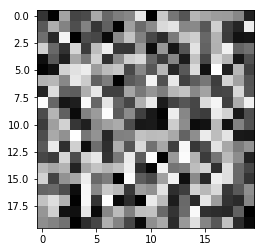

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randint(0,255,400).reshape(20,20)
plt.imshow(x,cmap="gray")
plt.show()

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train/255
x_test = x_test/255
#plt.imshow(x_train[0],cmap="gray")
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)



In [5]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
layer1 = tf.keras.layers.Dense(128,activation=tf.nn.sigmoid)
model.add(layer1)
model.add(tf.keras.layers.Dense(128,activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dropout(0.2)) #kör dropout på tidigare layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics = ["accuracy"])
model.fit(x_train,y_train,epochs=3) ##epochs är att istället när kör SGD så shufflar all training data
                                    ##och loopar igenom den och efter detta shufflar igen och börjar epoch 2
                                    ##tänker att efter varje epoch slänger in training i nätverket och kollar accuracy
        
print(model.get_weights())


Epoch 1/3
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4720 - acc: 0.8656
Epoch 2/3
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1954 - acc: 0.9418
Epoch 3/3
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1388 - acc: 0.9586
[array([[-0.00922735,  0.06336758,  0.06498013, ...,  0.06630816,
         0.00010712,  0.03837881],
       [-0.02981912, -0.04740258,  0.07047231, ...,  0.04108319,
         0.0231991 ,  0.0291    ],
       [ 0.03423042, -0.04205349,  0.0036829 , ..., -0.03780036,
        -0.01013147,  0.06931847],
       ...,
       [-0.00147828,  0.06044058, -0.03451389, ..., -0.05549707,
         0.06241282,  0.0532132 ],
       [ 0.04277243, -0.02075357, -0.0420008 , ..., -0.06477511,
        -0.06073669, -0.04953318],
       [ 0.03279316, -0.00644892, -0.07220621, ..., -0.0583479 ,
         0.05826371,  0.01128861]], dtype=float32), array([-0.11740883, -0.04969174,  0.02730679, -0.05537133,  0.13

In [5]:
model = tf.keras.models.Sequential() ##no flattening which makes sense since this is a CNN
model.add(tf.keras.layers.Conv2D(28,kernel_size=(3,3),input_shape=(28,28,1))) ##28 filters
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten()) ##to add a fully connected layer!!
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_initializer='random_uniform'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.fit(x_train,y_train,epochs=3)



ValueError: Error when checking input: expected conv2d_input to have 4 dimensions, but got array with shape (60000, 28, 28)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.0816 - acc: 0.9763
0.08156993434948381
2
[[3.5192922e-08 2.9340961e-07 1.1649889e-05 ... 9.9992502e-01
  5.6641490e-08 6.2747504e-06]
 [1.7075955e-07 1.2925459e-04 9.9902797e-01 ... 6.0852028e-07
  7.7101111e-05 8.6813501e-11]
 [1.2261962e-06 9.9899012e-01 8.8188470e-05 ... 4.4165217e-04
  2.9902539e-04 1.0818250e-05]
 ...
 [1.0751650e-09 3.0631536e-08 7.5621376e-09 ... 1.9826977e-05
  5.5558768e-08 1.4971584e-05]
 [3.2422860e-09 2.7031138e-11 3.5626068e-12 ... 1.4294303e-10
  1.1321387e-06 2.8869285e-10]
 [3.5389189e-10 9.2177699e-17 6.5029369e-14 ... 4.4519142e-18
  1.1777011e-12 1.4893939e-14]]


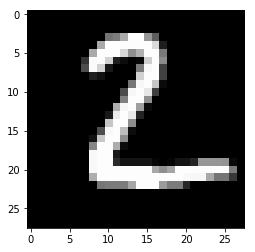

In [8]:
acc = model.evaluate(x_test,y_test)
print(acc[])
predictions = model.predict(x_test)
print(np.argmax(predictions[1]))
plt.imshow(x_test[1],cmap="gray")
print(predictions)


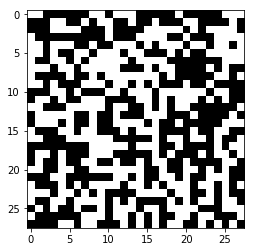

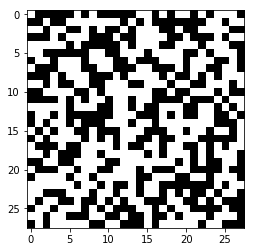

0
1


In [112]:
x_trainlr = np.load('x_trainlr.npy') ##märk skillnad mellan np.load och np.loadtxt
y_trainlr = np.load('y_trainlr.npy')
x_testlr = np.load('x_testlr.npy')
y_testlr = np.load('y_testlr.npy')


plt.imshow(x_trainlr[3000].reshape(28, 28),cmap='gray')
plt.show()
plt.imshow(x_trainlr[33000].reshape(28, 28),cmap='gray')
plt.show()

print(y_trainlr[3000])
print(y_trainlr[33000])



#x_trainlr = np.array([x.reshape(28,28) for x in x_trainlr])
#x_testlr = np.array([x.reshape(28,28) for x in x_testlr])

x_trainlr = x_trainlr.astype("float32")
x_testlr = x_testlr.astype("float32") ##gör om allt till float
#y_trainlr = y_trainlr.astype("float32")


#plt.imshow(x_trainlr[0],cmap="gray")

In [ ]:
import tensorflow as tf

modellr = tf.keras.models.Sequential() ##ESC+R+Y för att ta bort output!

modellr.add(tf.keras.layers.Conv2D(28,kernel_size=(1,10))) ##detta är en convolutional neural network
modellr.add(tf.keras.layers.MaxPooling2D(pool_size=(1,7))) ##notera mycket bättre jämför med vanligt
modellr.add(tf.keras.layers.Flatten())                    ##beroende på uppgiften måste vi välja rätt NN
modellr.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) ##ibland kanske RNN bättre för sekv.data
modellr.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
modellr.add(tf.keras.layers.Dropout(0.1))
modellr.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))


modellr.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics = ["accuracy"])
modellr.fit(x=x_trainlr,y=y_trainlr,epochs=3) ##tenorflow arbetar med tensorer som är som numpy arrayer





In [16]:
x = modellr.evaluate(x_testlr,y_testlr)
image_index = np.random.randint(10000)
pred = modellr.predict(x_testlr[image_index].reshape(1, 28, 28, 1))

plt.imshow(x_testlr[image_index].reshape(28,28),cmap="gray")
plt.show()
print(pred)
print(y_testlr[image_index])

##nätverket lär sig skilja på helt random bilder och bilder som är nästan random
##med tillägget att inte har någon long run (dvs samma siffra 9 ggr i rad)

NameError: name 'modellr' is not defined

In [2]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/%d.png" % epoch)
        plt.close()


if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=30000, batch_size=32, sample_interval=200)

0 [D loss: 0.860597, acc.: 10.94%] [G loss: 0.577041]
1 [D loss: 0.505681, acc.: 59.38%] [G loss: 0.630683]
2 [D loss: 0.406602, acc.: 70.31%] [G loss: 0.706924]
3 [D loss: 0.312458, acc.: 85.94%] [G loss: 0.866698]
4 [D loss: 0.268192, acc.: 93.75%] [G loss: 0.988849]
5 [D loss: 0.245661, acc.: 98.44%] [G loss: 1.165511]
6 [D loss: 0.219834, acc.: 98.44%] [G loss: 1.241911]
7 [D loss: 0.187586, acc.: 100.00%] [G loss: 1.401114]
8 [D loss: 0.156013, acc.: 100.00%] [G loss: 1.561593]
9 [D loss: 0.141490, acc.: 100.00%] [G loss: 1.630034]
10 [D loss: 0.126099, acc.: 100.00%] [G loss: 1.765739]
11 [D loss: 0.107182, acc.: 100.00%] [G loss: 1.844712]
12 [D loss: 0.106369, acc.: 100.00%] [G loss: 1.886481]
13 [D loss: 0.093213, acc.: 100.00%] [G loss: 1.979300]
14 [D loss: 0.100972, acc.: 100.00%] [G loss: 2.123684]
15 [D loss: 0.084693, acc.: 100.00%] [G loss: 2.141114]
16 [D loss: 0.079270, acc.: 100.00%] [G loss: 2.275896]
17 [D loss: 0.070850, acc.: 100.00%] [G loss: 2.233686]
18 [D los

147 [D loss: 0.099534, acc.: 95.31%] [G loss: 4.017415]
148 [D loss: 0.041800, acc.: 98.44%] [G loss: 4.426675]
149 [D loss: 0.267500, acc.: 89.06%] [G loss: 3.571620]
150 [D loss: 0.067410, acc.: 98.44%] [G loss: 4.316819]
151 [D loss: 0.158387, acc.: 92.19%] [G loss: 4.046438]
152 [D loss: 0.063488, acc.: 100.00%] [G loss: 3.794079]
153 [D loss: 0.123565, acc.: 93.75%] [G loss: 3.906637]
154 [D loss: 0.372810, acc.: 84.38%] [G loss: 3.743522]
155 [D loss: 0.072990, acc.: 98.44%] [G loss: 3.746978]
156 [D loss: 0.170280, acc.: 93.75%] [G loss: 3.846266]
157 [D loss: 0.104821, acc.: 95.31%] [G loss: 4.424155]
158 [D loss: 0.234396, acc.: 90.62%] [G loss: 3.522993]
159 [D loss: 0.097300, acc.: 93.75%] [G loss: 4.776314]
160 [D loss: 1.348084, acc.: 53.12%] [G loss: 1.891870]
161 [D loss: 0.744162, acc.: 71.88%] [G loss: 1.683933]
162 [D loss: 0.278864, acc.: 82.81%] [G loss: 3.090914]
163 [D loss: 0.075197, acc.: 96.88%] [G loss: 4.480742]
164 [D loss: 0.039817, acc.: 100.00%] [G loss: 

297 [D loss: 0.674612, acc.: 48.44%] [G loss: 0.734253]
298 [D loss: 0.679027, acc.: 50.00%] [G loss: 0.748933]
299 [D loss: 0.692376, acc.: 43.75%] [G loss: 0.713892]
300 [D loss: 0.692479, acc.: 45.31%] [G loss: 0.694151]
301 [D loss: 0.632641, acc.: 50.00%] [G loss: 0.750183]
302 [D loss: 0.682811, acc.: 43.75%] [G loss: 0.735321]
303 [D loss: 0.668481, acc.: 51.56%] [G loss: 0.724983]
304 [D loss: 0.679622, acc.: 43.75%] [G loss: 0.747495]
305 [D loss: 0.654141, acc.: 50.00%] [G loss: 0.717688]
306 [D loss: 0.642882, acc.: 53.12%] [G loss: 0.710700]
307 [D loss: 0.675317, acc.: 42.19%] [G loss: 0.733038]
308 [D loss: 0.651288, acc.: 57.81%] [G loss: 0.739557]
309 [D loss: 0.653097, acc.: 53.12%] [G loss: 0.736369]
310 [D loss: 0.636012, acc.: 53.12%] [G loss: 0.752974]
311 [D loss: 0.646323, acc.: 48.44%] [G loss: 0.761883]
312 [D loss: 0.724134, acc.: 34.38%] [G loss: 0.702065]
313 [D loss: 0.646818, acc.: 46.88%] [G loss: 0.727337]
314 [D loss: 0.721296, acc.: 35.94%] [G loss: 0.

444 [D loss: 0.641999, acc.: 53.12%] [G loss: 0.690017]
445 [D loss: 0.632635, acc.: 67.19%] [G loss: 0.712397]
446 [D loss: 0.650995, acc.: 50.00%] [G loss: 0.681721]
447 [D loss: 0.640254, acc.: 64.06%] [G loss: 0.710042]
448 [D loss: 0.666559, acc.: 60.94%] [G loss: 0.740826]
449 [D loss: 0.642918, acc.: 64.06%] [G loss: 0.750051]
450 [D loss: 0.628607, acc.: 67.19%] [G loss: 0.759161]
451 [D loss: 0.642607, acc.: 60.94%] [G loss: 0.746263]
452 [D loss: 0.651746, acc.: 57.81%] [G loss: 0.762169]
453 [D loss: 0.666621, acc.: 53.12%] [G loss: 0.748905]
454 [D loss: 0.643839, acc.: 57.81%] [G loss: 0.733481]
455 [D loss: 0.639813, acc.: 60.94%] [G loss: 0.736435]
456 [D loss: 0.619622, acc.: 65.62%] [G loss: 0.720443]
457 [D loss: 0.660223, acc.: 46.88%] [G loss: 0.717297]
458 [D loss: 0.623603, acc.: 64.06%] [G loss: 0.728356]
459 [D loss: 0.635477, acc.: 68.75%] [G loss: 0.748145]
460 [D loss: 0.646861, acc.: 60.94%] [G loss: 0.738714]
461 [D loss: 0.626131, acc.: 60.94%] [G loss: 0.

591 [D loss: 0.640667, acc.: 64.06%] [G loss: 0.845658]
592 [D loss: 0.646185, acc.: 64.06%] [G loss: 0.799947]
593 [D loss: 0.640903, acc.: 59.38%] [G loss: 0.834654]
594 [D loss: 0.635965, acc.: 70.31%] [G loss: 0.822723]
595 [D loss: 0.618632, acc.: 64.06%] [G loss: 0.805490]
596 [D loss: 0.608877, acc.: 73.44%] [G loss: 0.782543]
597 [D loss: 0.648050, acc.: 67.19%] [G loss: 0.804464]
598 [D loss: 0.639651, acc.: 68.75%] [G loss: 0.775851]
599 [D loss: 0.615809, acc.: 65.62%] [G loss: 0.786652]
600 [D loss: 0.596615, acc.: 70.31%] [G loss: 0.820037]
601 [D loss: 0.639869, acc.: 54.69%] [G loss: 0.810356]
602 [D loss: 0.591514, acc.: 65.62%] [G loss: 0.834659]
603 [D loss: 0.596305, acc.: 73.44%] [G loss: 0.829054]
604 [D loss: 0.633253, acc.: 62.50%] [G loss: 0.807155]
605 [D loss: 0.598285, acc.: 75.00%] [G loss: 0.784486]
606 [D loss: 0.659461, acc.: 56.25%] [G loss: 0.789805]
607 [D loss: 0.613406, acc.: 67.19%] [G loss: 0.847758]
608 [D loss: 0.619149, acc.: 71.88%] [G loss: 0.

740 [D loss: 0.582686, acc.: 76.56%] [G loss: 0.864528]
741 [D loss: 0.605503, acc.: 68.75%] [G loss: 0.862710]
742 [D loss: 0.604198, acc.: 71.88%] [G loss: 0.857477]
743 [D loss: 0.623914, acc.: 70.31%] [G loss: 0.829575]
744 [D loss: 0.626493, acc.: 70.31%] [G loss: 0.815411]
745 [D loss: 0.608418, acc.: 65.62%] [G loss: 0.839712]
746 [D loss: 0.644781, acc.: 68.75%] [G loss: 0.782909]
747 [D loss: 0.591056, acc.: 71.88%] [G loss: 0.780842]
748 [D loss: 0.635620, acc.: 64.06%] [G loss: 0.786871]
749 [D loss: 0.607742, acc.: 62.50%] [G loss: 0.742568]
750 [D loss: 0.661840, acc.: 60.94%] [G loss: 0.745914]
751 [D loss: 0.616810, acc.: 64.06%] [G loss: 0.828985]
752 [D loss: 0.615666, acc.: 64.06%] [G loss: 0.774329]
753 [D loss: 0.616824, acc.: 67.19%] [G loss: 0.837440]
754 [D loss: 0.582885, acc.: 71.88%] [G loss: 0.857744]
755 [D loss: 0.614941, acc.: 76.56%] [G loss: 0.883017]
756 [D loss: 0.611169, acc.: 71.88%] [G loss: 0.867174]
757 [D loss: 0.609017, acc.: 67.19%] [G loss: 0.

888 [D loss: 0.615256, acc.: 75.00%] [G loss: 0.831725]
889 [D loss: 0.602945, acc.: 64.06%] [G loss: 0.832390]
890 [D loss: 0.594913, acc.: 70.31%] [G loss: 0.808106]
891 [D loss: 0.670370, acc.: 59.38%] [G loss: 0.832012]
892 [D loss: 0.594916, acc.: 71.88%] [G loss: 0.871531]
893 [D loss: 0.595055, acc.: 68.75%] [G loss: 0.874386]
894 [D loss: 0.660562, acc.: 54.69%] [G loss: 0.815490]
895 [D loss: 0.650627, acc.: 59.38%] [G loss: 0.870902]
896 [D loss: 0.642665, acc.: 62.50%] [G loss: 0.865609]
897 [D loss: 0.643828, acc.: 67.19%] [G loss: 0.874593]
898 [D loss: 0.678768, acc.: 56.25%] [G loss: 0.827167]
899 [D loss: 0.653410, acc.: 67.19%] [G loss: 0.868999]
900 [D loss: 0.624959, acc.: 68.75%] [G loss: 0.903296]
901 [D loss: 0.561292, acc.: 76.56%] [G loss: 0.926788]
902 [D loss: 0.596952, acc.: 62.50%] [G loss: 0.813763]
903 [D loss: 0.580112, acc.: 73.44%] [G loss: 0.884503]
904 [D loss: 0.594109, acc.: 60.94%] [G loss: 0.943297]
905 [D loss: 0.584792, acc.: 68.75%] [G loss: 0.

1035 [D loss: 0.644332, acc.: 65.62%] [G loss: 0.963597]
1036 [D loss: 0.591908, acc.: 73.44%] [G loss: 0.962361]
1037 [D loss: 0.626110, acc.: 62.50%] [G loss: 0.940883]
1038 [D loss: 0.551372, acc.: 78.12%] [G loss: 0.896099]
1039 [D loss: 0.582264, acc.: 79.69%] [G loss: 0.925026]
1040 [D loss: 0.581505, acc.: 73.44%] [G loss: 0.884109]
1041 [D loss: 0.528488, acc.: 81.25%] [G loss: 0.928844]
1042 [D loss: 0.582108, acc.: 67.19%] [G loss: 0.935645]
1043 [D loss: 0.563100, acc.: 71.88%] [G loss: 0.864691]
1044 [D loss: 0.540999, acc.: 71.88%] [G loss: 0.856137]
1045 [D loss: 0.556796, acc.: 76.56%] [G loss: 0.911379]
1046 [D loss: 0.640051, acc.: 59.38%] [G loss: 0.902818]
1047 [D loss: 0.575829, acc.: 76.56%] [G loss: 0.948403]
1048 [D loss: 0.557103, acc.: 78.12%] [G loss: 0.943736]
1049 [D loss: 0.606807, acc.: 64.06%] [G loss: 0.906863]
1050 [D loss: 0.603201, acc.: 65.62%] [G loss: 0.910230]
1051 [D loss: 0.572845, acc.: 68.75%] [G loss: 0.895220]
1052 [D loss: 0.532753, acc.: 7

1179 [D loss: 0.574786, acc.: 60.94%] [G loss: 0.855584]
1180 [D loss: 0.629481, acc.: 67.19%] [G loss: 0.972268]
1181 [D loss: 0.623418, acc.: 68.75%] [G loss: 0.887485]
1182 [D loss: 0.626970, acc.: 64.06%] [G loss: 0.899814]
1183 [D loss: 0.550225, acc.: 78.12%] [G loss: 1.025437]
1184 [D loss: 0.561757, acc.: 71.88%] [G loss: 1.009530]
1185 [D loss: 0.555314, acc.: 76.56%] [G loss: 1.016835]
1186 [D loss: 0.575674, acc.: 67.19%] [G loss: 0.964105]
1187 [D loss: 0.576937, acc.: 75.00%] [G loss: 0.883890]
1188 [D loss: 0.532862, acc.: 73.44%] [G loss: 0.978447]
1189 [D loss: 0.604684, acc.: 67.19%] [G loss: 0.964400]
1190 [D loss: 0.616393, acc.: 62.50%] [G loss: 0.908136]
1191 [D loss: 0.569803, acc.: 73.44%] [G loss: 0.957813]
1192 [D loss: 0.575292, acc.: 76.56%] [G loss: 1.019364]
1193 [D loss: 0.575789, acc.: 67.19%] [G loss: 0.985381]
1194 [D loss: 0.554705, acc.: 76.56%] [G loss: 1.033882]
1195 [D loss: 0.540969, acc.: 76.56%] [G loss: 0.991266]
1196 [D loss: 0.561575, acc.: 7

1326 [D loss: 0.599214, acc.: 71.88%] [G loss: 0.942596]
1327 [D loss: 0.607330, acc.: 67.19%] [G loss: 0.995070]
1328 [D loss: 0.546030, acc.: 81.25%] [G loss: 0.913920]
1329 [D loss: 0.556153, acc.: 73.44%] [G loss: 0.985655]
1330 [D loss: 0.569583, acc.: 71.88%] [G loss: 1.032760]
1331 [D loss: 0.531813, acc.: 79.69%] [G loss: 1.044008]
1332 [D loss: 0.570441, acc.: 70.31%] [G loss: 1.091638]
1333 [D loss: 0.610605, acc.: 65.62%] [G loss: 0.994551]
1334 [D loss: 0.559709, acc.: 81.25%] [G loss: 1.004520]
1335 [D loss: 0.588167, acc.: 71.88%] [G loss: 0.922420]
1336 [D loss: 0.540010, acc.: 81.25%] [G loss: 1.021748]
1337 [D loss: 0.554146, acc.: 71.88%] [G loss: 1.040464]
1338 [D loss: 0.541055, acc.: 73.44%] [G loss: 1.036010]
1339 [D loss: 0.608091, acc.: 65.62%] [G loss: 0.990682]
1340 [D loss: 0.529472, acc.: 71.88%] [G loss: 1.082718]
1341 [D loss: 0.583693, acc.: 70.31%] [G loss: 1.088738]
1342 [D loss: 0.493760, acc.: 84.38%] [G loss: 1.018532]
1343 [D loss: 0.610360, acc.: 6

1473 [D loss: 0.582962, acc.: 60.94%] [G loss: 0.976451]
1474 [D loss: 0.521112, acc.: 78.12%] [G loss: 0.998844]
1475 [D loss: 0.565932, acc.: 70.31%] [G loss: 0.971726]
1476 [D loss: 0.610226, acc.: 65.62%] [G loss: 0.987005]
1477 [D loss: 0.592356, acc.: 68.75%] [G loss: 0.920756]
1478 [D loss: 0.590158, acc.: 64.06%] [G loss: 0.957880]
1479 [D loss: 0.606601, acc.: 71.88%] [G loss: 0.988860]
1480 [D loss: 0.570162, acc.: 68.75%] [G loss: 0.979091]
1481 [D loss: 0.552464, acc.: 73.44%] [G loss: 0.976775]
1482 [D loss: 0.543401, acc.: 75.00%] [G loss: 0.905287]
1483 [D loss: 0.570883, acc.: 71.88%] [G loss: 0.894897]
1484 [D loss: 0.548733, acc.: 70.31%] [G loss: 0.890783]
1485 [D loss: 0.569178, acc.: 75.00%] [G loss: 1.083565]
1486 [D loss: 0.467689, acc.: 84.38%] [G loss: 1.027523]
1487 [D loss: 0.553980, acc.: 68.75%] [G loss: 0.986529]
1488 [D loss: 0.559098, acc.: 73.44%] [G loss: 0.998512]
1489 [D loss: 0.594503, acc.: 76.56%] [G loss: 0.965713]
1490 [D loss: 0.509947, acc.: 8

1619 [D loss: 0.591153, acc.: 65.62%] [G loss: 0.896049]
1620 [D loss: 0.608606, acc.: 67.19%] [G loss: 1.049940]
1621 [D loss: 0.557080, acc.: 79.69%] [G loss: 0.978700]
1622 [D loss: 0.589158, acc.: 70.31%] [G loss: 1.007294]
1623 [D loss: 0.644366, acc.: 60.94%] [G loss: 1.013760]
1624 [D loss: 0.566857, acc.: 78.12%] [G loss: 0.922057]
1625 [D loss: 0.603222, acc.: 70.31%] [G loss: 1.017650]
1626 [D loss: 0.531651, acc.: 78.12%] [G loss: 1.012512]
1627 [D loss: 0.596186, acc.: 73.44%] [G loss: 0.920641]
1628 [D loss: 0.550856, acc.: 73.44%] [G loss: 0.996793]
1629 [D loss: 0.501754, acc.: 82.81%] [G loss: 1.062674]
1630 [D loss: 0.618948, acc.: 62.50%] [G loss: 0.971945]
1631 [D loss: 0.557995, acc.: 75.00%] [G loss: 0.924039]
1632 [D loss: 0.575637, acc.: 75.00%] [G loss: 1.004215]
1633 [D loss: 0.544088, acc.: 76.56%] [G loss: 0.999492]
1634 [D loss: 0.577488, acc.: 75.00%] [G loss: 0.986111]
1635 [D loss: 0.582859, acc.: 68.75%] [G loss: 0.881456]
1636 [D loss: 0.555245, acc.: 7

1765 [D loss: 0.629483, acc.: 64.06%] [G loss: 0.936494]
1766 [D loss: 0.550494, acc.: 79.69%] [G loss: 0.954350]
1767 [D loss: 0.616677, acc.: 68.75%] [G loss: 0.924486]
1768 [D loss: 0.583502, acc.: 70.31%] [G loss: 0.933383]
1769 [D loss: 0.530813, acc.: 81.25%] [G loss: 0.991596]
1770 [D loss: 0.604974, acc.: 71.88%] [G loss: 0.936144]
1771 [D loss: 0.532765, acc.: 81.25%] [G loss: 0.908965]
1772 [D loss: 0.550809, acc.: 75.00%] [G loss: 1.030397]
1773 [D loss: 0.582504, acc.: 70.31%] [G loss: 0.976747]
1774 [D loss: 0.639687, acc.: 70.31%] [G loss: 0.913447]
1775 [D loss: 0.692708, acc.: 54.69%] [G loss: 0.899952]
1776 [D loss: 0.568598, acc.: 67.19%] [G loss: 1.013950]
1777 [D loss: 0.537389, acc.: 73.44%] [G loss: 1.025086]
1778 [D loss: 0.613616, acc.: 64.06%] [G loss: 1.001009]
1779 [D loss: 0.716570, acc.: 53.12%] [G loss: 0.998580]
1780 [D loss: 0.583308, acc.: 71.88%] [G loss: 0.963912]
1781 [D loss: 0.556994, acc.: 70.31%] [G loss: 1.037562]
1782 [D loss: 0.597931, acc.: 6

1909 [D loss: 0.577202, acc.: 79.69%] [G loss: 0.964414]
1910 [D loss: 0.555485, acc.: 73.44%] [G loss: 0.978887]
1911 [D loss: 0.617012, acc.: 71.88%] [G loss: 0.935183]
1912 [D loss: 0.568545, acc.: 71.88%] [G loss: 0.891608]
1913 [D loss: 0.657182, acc.: 57.81%] [G loss: 0.924908]
1914 [D loss: 0.557286, acc.: 68.75%] [G loss: 0.913788]
1915 [D loss: 0.588587, acc.: 70.31%] [G loss: 0.983733]
1916 [D loss: 0.547915, acc.: 76.56%] [G loss: 0.905132]
1917 [D loss: 0.566438, acc.: 68.75%] [G loss: 0.910339]
1918 [D loss: 0.614638, acc.: 64.06%] [G loss: 0.962465]
1919 [D loss: 0.559692, acc.: 67.19%] [G loss: 0.886976]
1920 [D loss: 0.684692, acc.: 59.38%] [G loss: 0.959215]
1921 [D loss: 0.579169, acc.: 67.19%] [G loss: 0.860268]
1922 [D loss: 0.610063, acc.: 64.06%] [G loss: 0.906996]
1923 [D loss: 0.634215, acc.: 62.50%] [G loss: 0.912643]
1924 [D loss: 0.618179, acc.: 65.62%] [G loss: 1.007756]
1925 [D loss: 0.596263, acc.: 67.19%] [G loss: 0.913503]
1926 [D loss: 0.619260, acc.: 6

2054 [D loss: 0.544051, acc.: 79.69%] [G loss: 0.913365]
2055 [D loss: 0.539822, acc.: 82.81%] [G loss: 0.971315]
2056 [D loss: 0.599453, acc.: 62.50%] [G loss: 0.988268]
2057 [D loss: 0.537776, acc.: 76.56%] [G loss: 1.033937]
2058 [D loss: 0.561854, acc.: 75.00%] [G loss: 1.009700]
2059 [D loss: 0.571484, acc.: 73.44%] [G loss: 1.013966]
2060 [D loss: 0.576617, acc.: 73.44%] [G loss: 0.977517]
2061 [D loss: 0.549298, acc.: 76.56%] [G loss: 1.071991]
2062 [D loss: 0.559418, acc.: 70.31%] [G loss: 0.992204]
2063 [D loss: 0.563874, acc.: 71.88%] [G loss: 1.020871]
2064 [D loss: 0.561478, acc.: 68.75%] [G loss: 0.983722]
2065 [D loss: 0.644645, acc.: 64.06%] [G loss: 0.977371]
2066 [D loss: 0.563925, acc.: 78.12%] [G loss: 0.926050]
2067 [D loss: 0.593688, acc.: 62.50%] [G loss: 1.007311]
2068 [D loss: 0.581324, acc.: 71.88%] [G loss: 0.979562]
2069 [D loss: 0.599552, acc.: 65.62%] [G loss: 1.001150]
2070 [D loss: 0.603963, acc.: 64.06%] [G loss: 0.909854]
2071 [D loss: 0.574103, acc.: 7

2201 [D loss: 0.612362, acc.: 65.62%] [G loss: 0.944333]
2202 [D loss: 0.621680, acc.: 64.06%] [G loss: 1.016917]
2203 [D loss: 0.578129, acc.: 70.31%] [G loss: 0.979823]
2204 [D loss: 0.613797, acc.: 60.94%] [G loss: 0.971562]
2205 [D loss: 0.622922, acc.: 70.31%] [G loss: 0.928109]
2206 [D loss: 0.545163, acc.: 75.00%] [G loss: 0.948042]
2207 [D loss: 0.596850, acc.: 62.50%] [G loss: 1.056517]
2208 [D loss: 0.654342, acc.: 56.25%] [G loss: 1.064341]
2209 [D loss: 0.632257, acc.: 64.06%] [G loss: 0.914560]
2210 [D loss: 0.613732, acc.: 71.88%] [G loss: 0.913320]
2211 [D loss: 0.519822, acc.: 71.88%] [G loss: 0.994737]
2212 [D loss: 0.571885, acc.: 71.88%] [G loss: 0.972085]
2213 [D loss: 0.606161, acc.: 62.50%] [G loss: 0.988282]
2214 [D loss: 0.620716, acc.: 64.06%] [G loss: 0.897936]
2215 [D loss: 0.588579, acc.: 71.88%] [G loss: 0.887098]
2216 [D loss: 0.560932, acc.: 71.88%] [G loss: 0.987637]
2217 [D loss: 0.632837, acc.: 65.62%] [G loss: 0.920881]
2218 [D loss: 0.499691, acc.: 8

2345 [D loss: 0.650082, acc.: 56.25%] [G loss: 0.982793]
2346 [D loss: 0.678292, acc.: 62.50%] [G loss: 0.962321]
2347 [D loss: 0.592577, acc.: 71.88%] [G loss: 0.942451]
2348 [D loss: 0.635494, acc.: 60.94%] [G loss: 0.969015]
2349 [D loss: 0.577885, acc.: 70.31%] [G loss: 0.967875]
2350 [D loss: 0.477720, acc.: 79.69%] [G loss: 0.996586]
2351 [D loss: 0.625671, acc.: 64.06%] [G loss: 0.970393]
2352 [D loss: 0.638898, acc.: 62.50%] [G loss: 0.971696]
2353 [D loss: 0.650259, acc.: 57.81%] [G loss: 0.989591]
2354 [D loss: 0.531409, acc.: 84.38%] [G loss: 0.901817]
2355 [D loss: 0.602746, acc.: 65.62%] [G loss: 0.999830]
2356 [D loss: 0.604008, acc.: 70.31%] [G loss: 1.061214]
2357 [D loss: 0.576135, acc.: 73.44%] [G loss: 1.037895]
2358 [D loss: 0.651259, acc.: 60.94%] [G loss: 0.964528]
2359 [D loss: 0.644282, acc.: 65.62%] [G loss: 0.976253]
2360 [D loss: 0.617088, acc.: 59.38%] [G loss: 1.043615]
2361 [D loss: 0.601519, acc.: 67.19%] [G loss: 1.025171]
2362 [D loss: 0.594115, acc.: 6

2491 [D loss: 0.620969, acc.: 68.75%] [G loss: 0.975514]
2492 [D loss: 0.595505, acc.: 70.31%] [G loss: 1.030312]
2493 [D loss: 0.568266, acc.: 68.75%] [G loss: 0.990120]
2494 [D loss: 0.583496, acc.: 73.44%] [G loss: 0.946278]
2495 [D loss: 0.568216, acc.: 71.88%] [G loss: 0.947282]
2496 [D loss: 0.623333, acc.: 68.75%] [G loss: 0.917909]
2497 [D loss: 0.519237, acc.: 84.38%] [G loss: 0.995980]
2498 [D loss: 0.582604, acc.: 70.31%] [G loss: 0.968041]
2499 [D loss: 0.648291, acc.: 67.19%] [G loss: 0.944150]
2500 [D loss: 0.669256, acc.: 59.38%] [G loss: 0.843167]
2501 [D loss: 0.617362, acc.: 57.81%] [G loss: 0.966895]
2502 [D loss: 0.593575, acc.: 65.62%] [G loss: 1.023573]
2503 [D loss: 0.567057, acc.: 71.88%] [G loss: 1.087971]
2504 [D loss: 0.593919, acc.: 71.88%] [G loss: 1.006911]
2505 [D loss: 0.646524, acc.: 57.81%] [G loss: 0.963353]
2506 [D loss: 0.574681, acc.: 70.31%] [G loss: 0.951911]
2507 [D loss: 0.554461, acc.: 71.88%] [G loss: 0.976485]
2508 [D loss: 0.586778, acc.: 7

2638 [D loss: 0.580555, acc.: 71.88%] [G loss: 0.983784]
2639 [D loss: 0.617955, acc.: 70.31%] [G loss: 1.013506]
2640 [D loss: 0.588428, acc.: 70.31%] [G loss: 0.990887]
2641 [D loss: 0.655662, acc.: 53.12%] [G loss: 1.008038]
2642 [D loss: 0.552553, acc.: 71.88%] [G loss: 0.963298]
2643 [D loss: 0.608685, acc.: 67.19%] [G loss: 0.959218]
2644 [D loss: 0.648931, acc.: 65.62%] [G loss: 0.997629]
2645 [D loss: 0.552444, acc.: 71.88%] [G loss: 0.940532]
2646 [D loss: 0.663622, acc.: 56.25%] [G loss: 0.996055]
2647 [D loss: 0.567415, acc.: 76.56%] [G loss: 1.071615]
2648 [D loss: 0.540408, acc.: 76.56%] [G loss: 0.946822]
2649 [D loss: 0.603228, acc.: 68.75%] [G loss: 1.004277]
2650 [D loss: 0.549185, acc.: 73.44%] [G loss: 1.033209]
2651 [D loss: 0.643580, acc.: 64.06%] [G loss: 0.995920]
2652 [D loss: 0.711444, acc.: 53.12%] [G loss: 0.937780]
2653 [D loss: 0.565307, acc.: 68.75%] [G loss: 0.934438]
2654 [D loss: 0.651066, acc.: 60.94%] [G loss: 0.927241]
2655 [D loss: 0.588686, acc.: 6

2783 [D loss: 0.535711, acc.: 76.56%] [G loss: 1.016948]
2784 [D loss: 0.666260, acc.: 59.38%] [G loss: 0.945813]
2785 [D loss: 0.631416, acc.: 65.62%] [G loss: 0.931081]
2786 [D loss: 0.522415, acc.: 85.94%] [G loss: 0.935393]
2787 [D loss: 0.529676, acc.: 78.12%] [G loss: 0.881330]
2788 [D loss: 0.578095, acc.: 71.88%] [G loss: 0.890402]
2789 [D loss: 0.621250, acc.: 65.62%] [G loss: 0.981830]
2790 [D loss: 0.549290, acc.: 68.75%] [G loss: 1.005682]
2791 [D loss: 0.658780, acc.: 57.81%] [G loss: 1.047135]
2792 [D loss: 0.592586, acc.: 70.31%] [G loss: 0.967537]
2793 [D loss: 0.556651, acc.: 67.19%] [G loss: 0.978283]
2794 [D loss: 0.721776, acc.: 54.69%] [G loss: 1.005073]
2795 [D loss: 0.596409, acc.: 71.88%] [G loss: 1.038926]
2796 [D loss: 0.612819, acc.: 64.06%] [G loss: 0.945866]
2797 [D loss: 0.523348, acc.: 81.25%] [G loss: 1.116605]
2798 [D loss: 0.623853, acc.: 64.06%] [G loss: 1.053649]
2799 [D loss: 0.618074, acc.: 65.62%] [G loss: 0.998151]
2800 [D loss: 0.607817, acc.: 7

2931 [D loss: 0.564001, acc.: 73.44%] [G loss: 0.958294]
2932 [D loss: 0.573037, acc.: 71.88%] [G loss: 0.898510]
2933 [D loss: 0.588364, acc.: 70.31%] [G loss: 0.876872]
2934 [D loss: 0.565775, acc.: 75.00%] [G loss: 0.885222]
2935 [D loss: 0.604072, acc.: 71.88%] [G loss: 1.012463]
2936 [D loss: 0.550116, acc.: 78.12%] [G loss: 1.002380]
2937 [D loss: 0.608713, acc.: 62.50%] [G loss: 1.012798]
2938 [D loss: 0.569872, acc.: 70.31%] [G loss: 0.916514]
2939 [D loss: 0.592647, acc.: 67.19%] [G loss: 0.939565]
2940 [D loss: 0.591007, acc.: 73.44%] [G loss: 0.909946]
2941 [D loss: 0.598143, acc.: 65.62%] [G loss: 0.955705]
2942 [D loss: 0.534993, acc.: 70.31%] [G loss: 1.034461]
2943 [D loss: 0.554524, acc.: 76.56%] [G loss: 1.020708]
2944 [D loss: 0.601312, acc.: 65.62%] [G loss: 1.049083]
2945 [D loss: 0.614236, acc.: 60.94%] [G loss: 0.953570]
2946 [D loss: 0.632104, acc.: 70.31%] [G loss: 1.062210]
2947 [D loss: 0.579094, acc.: 79.69%] [G loss: 0.983721]
2948 [D loss: 0.601750, acc.: 6

3078 [D loss: 0.551670, acc.: 76.56%] [G loss: 0.945803]
3079 [D loss: 0.576705, acc.: 68.75%] [G loss: 1.028534]
3080 [D loss: 0.628124, acc.: 64.06%] [G loss: 1.049716]
3081 [D loss: 0.679684, acc.: 60.94%] [G loss: 0.943637]
3082 [D loss: 0.574657, acc.: 70.31%] [G loss: 1.040061]
3083 [D loss: 0.628906, acc.: 70.31%] [G loss: 1.074551]
3084 [D loss: 0.616743, acc.: 68.75%] [G loss: 1.000049]
3085 [D loss: 0.578851, acc.: 67.19%] [G loss: 1.078093]
3086 [D loss: 0.679303, acc.: 65.62%] [G loss: 1.019080]
3087 [D loss: 0.679403, acc.: 57.81%] [G loss: 1.025817]
3088 [D loss: 0.533860, acc.: 70.31%] [G loss: 1.038806]
3089 [D loss: 0.546167, acc.: 79.69%] [G loss: 1.000584]
3090 [D loss: 0.587890, acc.: 68.75%] [G loss: 0.958948]
3091 [D loss: 0.512268, acc.: 84.38%] [G loss: 0.953170]
3092 [D loss: 0.567299, acc.: 73.44%] [G loss: 1.168269]
3093 [D loss: 0.548250, acc.: 75.00%] [G loss: 0.991314]
3094 [D loss: 0.583916, acc.: 70.31%] [G loss: 1.021154]
3095 [D loss: 0.518691, acc.: 7

3225 [D loss: 0.608711, acc.: 64.06%] [G loss: 0.949327]
3226 [D loss: 0.601631, acc.: 64.06%] [G loss: 1.044244]
3227 [D loss: 0.638961, acc.: 65.62%] [G loss: 1.004580]
3228 [D loss: 0.651499, acc.: 56.25%] [G loss: 0.996307]
3229 [D loss: 0.615258, acc.: 67.19%] [G loss: 1.049693]
3230 [D loss: 0.607257, acc.: 73.44%] [G loss: 0.991260]
3231 [D loss: 0.530623, acc.: 84.38%] [G loss: 0.962338]
3232 [D loss: 0.684600, acc.: 59.38%] [G loss: 0.956049]
3233 [D loss: 0.557549, acc.: 75.00%] [G loss: 1.109195]
3234 [D loss: 0.618146, acc.: 64.06%] [G loss: 0.986943]
3235 [D loss: 0.599487, acc.: 65.62%] [G loss: 0.988361]
3236 [D loss: 0.599513, acc.: 64.06%] [G loss: 0.962067]
3237 [D loss: 0.575727, acc.: 76.56%] [G loss: 0.962753]
3238 [D loss: 0.573145, acc.: 71.88%] [G loss: 1.064487]
3239 [D loss: 0.656541, acc.: 68.75%] [G loss: 0.947201]
3240 [D loss: 0.588514, acc.: 70.31%] [G loss: 0.922737]
3241 [D loss: 0.620937, acc.: 65.62%] [G loss: 1.031577]
3242 [D loss: 0.608593, acc.: 6

3369 [D loss: 0.601936, acc.: 67.19%] [G loss: 1.020432]
3370 [D loss: 0.585108, acc.: 68.75%] [G loss: 1.043492]
3371 [D loss: 0.556862, acc.: 75.00%] [G loss: 1.066146]
3372 [D loss: 0.599430, acc.: 73.44%] [G loss: 0.976228]
3373 [D loss: 0.596330, acc.: 67.19%] [G loss: 1.062741]
3374 [D loss: 0.645281, acc.: 70.31%] [G loss: 1.079746]
3375 [D loss: 0.635966, acc.: 64.06%] [G loss: 1.011619]
3376 [D loss: 0.710461, acc.: 51.56%] [G loss: 1.000491]
3377 [D loss: 0.641444, acc.: 60.94%] [G loss: 1.126509]
3378 [D loss: 0.571244, acc.: 67.19%] [G loss: 1.028533]
3379 [D loss: 0.563803, acc.: 78.12%] [G loss: 1.079044]
3380 [D loss: 0.587235, acc.: 73.44%] [G loss: 1.002189]
3381 [D loss: 0.686212, acc.: 62.50%] [G loss: 0.943249]
3382 [D loss: 0.629007, acc.: 60.94%] [G loss: 0.894864]
3383 [D loss: 0.583698, acc.: 73.44%] [G loss: 0.986453]
3384 [D loss: 0.644092, acc.: 60.94%] [G loss: 1.007475]
3385 [D loss: 0.596280, acc.: 71.88%] [G loss: 0.970102]
3386 [D loss: 0.529192, acc.: 7

3515 [D loss: 0.573210, acc.: 76.56%] [G loss: 0.972397]
3516 [D loss: 0.528913, acc.: 79.69%] [G loss: 0.902823]
3517 [D loss: 0.618121, acc.: 65.62%] [G loss: 1.012140]
3518 [D loss: 0.561734, acc.: 71.88%] [G loss: 0.928368]
3519 [D loss: 0.601275, acc.: 68.75%] [G loss: 1.014205]
3520 [D loss: 0.560920, acc.: 73.44%] [G loss: 0.931218]
3521 [D loss: 0.568266, acc.: 67.19%] [G loss: 1.000989]
3522 [D loss: 0.635901, acc.: 65.62%] [G loss: 0.993567]
3523 [D loss: 0.613696, acc.: 64.06%] [G loss: 0.888559]
3524 [D loss: 0.550689, acc.: 76.56%] [G loss: 0.852247]
3525 [D loss: 0.585881, acc.: 70.31%] [G loss: 0.859238]
3526 [D loss: 0.607960, acc.: 70.31%] [G loss: 1.021929]
3527 [D loss: 0.570920, acc.: 71.88%] [G loss: 0.931040]
3528 [D loss: 0.583609, acc.: 70.31%] [G loss: 0.996568]
3529 [D loss: 0.568823, acc.: 75.00%] [G loss: 0.935076]
3530 [D loss: 0.589518, acc.: 70.31%] [G loss: 1.013510]
3531 [D loss: 0.560223, acc.: 76.56%] [G loss: 1.085548]
3532 [D loss: 0.657596, acc.: 5

3662 [D loss: 0.611568, acc.: 62.50%] [G loss: 0.934954]
3663 [D loss: 0.571892, acc.: 73.44%] [G loss: 1.008833]
3664 [D loss: 0.553403, acc.: 76.56%] [G loss: 0.972834]
3665 [D loss: 0.669921, acc.: 67.19%] [G loss: 1.085474]
3666 [D loss: 0.577323, acc.: 70.31%] [G loss: 1.051603]
3667 [D loss: 0.561553, acc.: 75.00%] [G loss: 1.049748]
3668 [D loss: 0.595010, acc.: 67.19%] [G loss: 0.901915]
3669 [D loss: 0.584107, acc.: 84.38%] [G loss: 0.920007]
3670 [D loss: 0.610724, acc.: 64.06%] [G loss: 0.983281]
3671 [D loss: 0.517601, acc.: 76.56%] [G loss: 0.930528]
3672 [D loss: 0.626648, acc.: 67.19%] [G loss: 1.001507]
3673 [D loss: 0.540274, acc.: 81.25%] [G loss: 0.967495]
3674 [D loss: 0.598133, acc.: 67.19%] [G loss: 1.033623]
3675 [D loss: 0.784051, acc.: 48.44%] [G loss: 0.931001]
3676 [D loss: 0.663308, acc.: 57.81%] [G loss: 0.968646]
3677 [D loss: 0.590631, acc.: 65.62%] [G loss: 1.009325]
3678 [D loss: 0.649019, acc.: 64.06%] [G loss: 1.028048]
3679 [D loss: 0.704250, acc.: 5

3809 [D loss: 0.582635, acc.: 62.50%] [G loss: 0.881333]
3810 [D loss: 0.592150, acc.: 68.75%] [G loss: 1.002281]
3811 [D loss: 0.581429, acc.: 73.44%] [G loss: 0.983243]
3812 [D loss: 0.594871, acc.: 62.50%] [G loss: 0.985313]
3813 [D loss: 0.553087, acc.: 73.44%] [G loss: 0.985191]
3814 [D loss: 0.589050, acc.: 67.19%] [G loss: 1.087920]
3815 [D loss: 0.548464, acc.: 76.56%] [G loss: 0.880564]
3816 [D loss: 0.573585, acc.: 67.19%] [G loss: 1.012075]
3817 [D loss: 0.601506, acc.: 65.62%] [G loss: 0.936382]
3818 [D loss: 0.619815, acc.: 60.94%] [G loss: 0.992058]
3819 [D loss: 0.659674, acc.: 64.06%] [G loss: 1.050677]
3820 [D loss: 0.620649, acc.: 62.50%] [G loss: 1.079901]
3821 [D loss: 0.603770, acc.: 65.62%] [G loss: 0.990753]
3822 [D loss: 0.563997, acc.: 68.75%] [G loss: 1.091564]
3823 [D loss: 0.672092, acc.: 57.81%] [G loss: 0.984879]
3824 [D loss: 0.592152, acc.: 70.31%] [G loss: 0.962603]
3825 [D loss: 0.557876, acc.: 68.75%] [G loss: 1.076260]
3826 [D loss: 0.594486, acc.: 6

3953 [D loss: 0.688429, acc.: 59.38%] [G loss: 0.934673]
3954 [D loss: 0.648641, acc.: 62.50%] [G loss: 0.970128]
3955 [D loss: 0.573175, acc.: 71.88%] [G loss: 1.066627]
3956 [D loss: 0.695122, acc.: 51.56%] [G loss: 1.074867]
3957 [D loss: 0.630601, acc.: 65.62%] [G loss: 0.999645]
3958 [D loss: 0.581315, acc.: 70.31%] [G loss: 0.949051]
3959 [D loss: 0.563938, acc.: 73.44%] [G loss: 1.034274]
3960 [D loss: 0.582252, acc.: 73.44%] [G loss: 1.108222]
3961 [D loss: 0.568490, acc.: 73.44%] [G loss: 0.973018]
3962 [D loss: 0.599416, acc.: 67.19%] [G loss: 0.937825]
3963 [D loss: 0.613936, acc.: 67.19%] [G loss: 0.908350]
3964 [D loss: 0.569975, acc.: 75.00%] [G loss: 1.050420]
3965 [D loss: 0.583099, acc.: 70.31%] [G loss: 1.046975]
3966 [D loss: 0.593511, acc.: 65.62%] [G loss: 0.948143]
3967 [D loss: 0.558998, acc.: 70.31%] [G loss: 0.954705]
3968 [D loss: 0.515862, acc.: 76.56%] [G loss: 0.935114]
3969 [D loss: 0.615237, acc.: 67.19%] [G loss: 0.991907]
3970 [D loss: 0.609126, acc.: 7

4099 [D loss: 0.564573, acc.: 70.31%] [G loss: 0.986243]
4100 [D loss: 0.646308, acc.: 57.81%] [G loss: 1.054716]
4101 [D loss: 0.586808, acc.: 67.19%] [G loss: 1.015207]
4102 [D loss: 0.630774, acc.: 64.06%] [G loss: 0.862019]
4103 [D loss: 0.556011, acc.: 75.00%] [G loss: 0.950395]
4104 [D loss: 0.558955, acc.: 79.69%] [G loss: 0.906296]
4105 [D loss: 0.649253, acc.: 62.50%] [G loss: 1.014385]
4106 [D loss: 0.582065, acc.: 75.00%] [G loss: 0.949193]
4107 [D loss: 0.643592, acc.: 64.06%] [G loss: 1.000701]
4108 [D loss: 0.626066, acc.: 67.19%] [G loss: 0.992230]
4109 [D loss: 0.543105, acc.: 76.56%] [G loss: 1.094511]
4110 [D loss: 0.593352, acc.: 65.62%] [G loss: 0.972701]
4111 [D loss: 0.568085, acc.: 70.31%] [G loss: 1.018543]
4112 [D loss: 0.577744, acc.: 68.75%] [G loss: 0.961335]
4113 [D loss: 0.585645, acc.: 68.75%] [G loss: 1.003239]
4114 [D loss: 0.575409, acc.: 71.88%] [G loss: 1.071025]
4115 [D loss: 0.497511, acc.: 78.12%] [G loss: 0.927218]
4116 [D loss: 0.586181, acc.: 6

4245 [D loss: 0.608572, acc.: 68.75%] [G loss: 0.981410]
4246 [D loss: 0.614797, acc.: 64.06%] [G loss: 0.951915]
4247 [D loss: 0.607618, acc.: 65.62%] [G loss: 1.077432]
4248 [D loss: 0.561860, acc.: 78.12%] [G loss: 0.968339]
4249 [D loss: 0.612690, acc.: 62.50%] [G loss: 0.983113]
4250 [D loss: 0.623046, acc.: 68.75%] [G loss: 0.937307]
4251 [D loss: 0.671954, acc.: 51.56%] [G loss: 0.964755]
4252 [D loss: 0.584487, acc.: 67.19%] [G loss: 1.007002]
4253 [D loss: 0.592607, acc.: 71.88%] [G loss: 1.043844]
4254 [D loss: 0.659725, acc.: 62.50%] [G loss: 0.994051]
4255 [D loss: 0.551196, acc.: 79.69%] [G loss: 0.925766]
4256 [D loss: 0.634684, acc.: 68.75%] [G loss: 1.045702]
4257 [D loss: 0.591058, acc.: 67.19%] [G loss: 1.074665]
4258 [D loss: 0.637411, acc.: 64.06%] [G loss: 1.079234]
4259 [D loss: 0.595201, acc.: 70.31%] [G loss: 1.041234]
4260 [D loss: 0.545438, acc.: 73.44%] [G loss: 1.043634]
4261 [D loss: 0.605537, acc.: 70.31%] [G loss: 0.942872]
4262 [D loss: 0.627472, acc.: 6

4389 [D loss: 0.605875, acc.: 67.19%] [G loss: 0.898360]
4390 [D loss: 0.610187, acc.: 70.31%] [G loss: 0.965713]
4391 [D loss: 0.624806, acc.: 67.19%] [G loss: 1.026552]
4392 [D loss: 0.599262, acc.: 71.88%] [G loss: 0.963614]
4393 [D loss: 0.575422, acc.: 73.44%] [G loss: 1.029688]
4394 [D loss: 0.659008, acc.: 60.94%] [G loss: 1.016810]
4395 [D loss: 0.641782, acc.: 64.06%] [G loss: 0.985162]
4396 [D loss: 0.670225, acc.: 59.38%] [G loss: 1.006934]
4397 [D loss: 0.584691, acc.: 70.31%] [G loss: 0.973366]
4398 [D loss: 0.616366, acc.: 67.19%] [G loss: 1.111944]
4399 [D loss: 0.561407, acc.: 75.00%] [G loss: 1.046024]
4400 [D loss: 0.651585, acc.: 59.38%] [G loss: 1.076137]
4401 [D loss: 0.659752, acc.: 62.50%] [G loss: 1.030767]
4402 [D loss: 0.507711, acc.: 84.38%] [G loss: 1.007620]
4403 [D loss: 0.616001, acc.: 71.88%] [G loss: 0.999068]
4404 [D loss: 0.641973, acc.: 62.50%] [G loss: 1.053300]
4405 [D loss: 0.625064, acc.: 60.94%] [G loss: 1.052499]
4406 [D loss: 0.562896, acc.: 7

4533 [D loss: 0.538251, acc.: 76.56%] [G loss: 1.080763]
4534 [D loss: 0.541362, acc.: 75.00%] [G loss: 1.082375]
4535 [D loss: 0.672867, acc.: 54.69%] [G loss: 0.991332]
4536 [D loss: 0.587291, acc.: 71.88%] [G loss: 0.940668]
4537 [D loss: 0.675456, acc.: 59.38%] [G loss: 0.950866]
4538 [D loss: 0.569349, acc.: 68.75%] [G loss: 0.962913]
4539 [D loss: 0.609064, acc.: 70.31%] [G loss: 0.939115]
4540 [D loss: 0.600297, acc.: 70.31%] [G loss: 0.922905]
4541 [D loss: 0.548589, acc.: 78.12%] [G loss: 0.981561]
4542 [D loss: 0.588063, acc.: 73.44%] [G loss: 1.025570]
4543 [D loss: 0.556604, acc.: 65.62%] [G loss: 0.978895]
4544 [D loss: 0.641082, acc.: 60.94%] [G loss: 1.040224]
4545 [D loss: 0.594709, acc.: 67.19%] [G loss: 1.008274]
4546 [D loss: 0.511686, acc.: 75.00%] [G loss: 0.931031]
4547 [D loss: 0.630903, acc.: 57.81%] [G loss: 1.019254]
4548 [D loss: 0.749088, acc.: 53.12%] [G loss: 1.033151]
4549 [D loss: 0.638633, acc.: 60.94%] [G loss: 1.063976]
4550 [D loss: 0.650994, acc.: 6

4677 [D loss: 0.635334, acc.: 67.19%] [G loss: 0.956536]
4678 [D loss: 0.561270, acc.: 71.88%] [G loss: 1.072022]
4679 [D loss: 0.658221, acc.: 54.69%] [G loss: 0.905154]
4680 [D loss: 0.676454, acc.: 60.94%] [G loss: 0.939143]
4681 [D loss: 0.674693, acc.: 62.50%] [G loss: 0.893654]
4682 [D loss: 0.561931, acc.: 75.00%] [G loss: 1.041186]
4683 [D loss: 0.588989, acc.: 68.75%] [G loss: 0.974356]
4684 [D loss: 0.621670, acc.: 64.06%] [G loss: 0.970154]
4685 [D loss: 0.526423, acc.: 78.12%] [G loss: 1.001765]
4686 [D loss: 0.591654, acc.: 71.88%] [G loss: 1.066427]
4687 [D loss: 0.565863, acc.: 70.31%] [G loss: 0.905064]
4688 [D loss: 0.550533, acc.: 71.88%] [G loss: 1.026057]
4689 [D loss: 0.568060, acc.: 71.88%] [G loss: 1.067300]
4690 [D loss: 0.569098, acc.: 70.31%] [G loss: 1.052125]
4691 [D loss: 0.743864, acc.: 53.12%] [G loss: 0.933859]
4692 [D loss: 0.704728, acc.: 50.00%] [G loss: 0.994550]
4693 [D loss: 0.567499, acc.: 70.31%] [G loss: 1.031020]
4694 [D loss: 0.653942, acc.: 6

4821 [D loss: 0.602318, acc.: 70.31%] [G loss: 1.048335]
4822 [D loss: 0.586650, acc.: 67.19%] [G loss: 1.060838]
4823 [D loss: 0.667400, acc.: 59.38%] [G loss: 0.903084]
4824 [D loss: 0.595410, acc.: 68.75%] [G loss: 0.942925]
4825 [D loss: 0.582987, acc.: 75.00%] [G loss: 0.936717]
4826 [D loss: 0.592569, acc.: 75.00%] [G loss: 0.972407]
4827 [D loss: 0.632733, acc.: 67.19%] [G loss: 1.007113]
4828 [D loss: 0.561363, acc.: 70.31%] [G loss: 1.051612]
4829 [D loss: 0.667013, acc.: 64.06%] [G loss: 0.925727]
4830 [D loss: 0.652615, acc.: 64.06%] [G loss: 0.999438]
4831 [D loss: 0.629175, acc.: 59.38%] [G loss: 1.069667]
4832 [D loss: 0.600312, acc.: 67.19%] [G loss: 1.091743]
4833 [D loss: 0.664614, acc.: 62.50%] [G loss: 0.959131]
4834 [D loss: 0.592855, acc.: 65.62%] [G loss: 0.864670]
4835 [D loss: 0.638537, acc.: 67.19%] [G loss: 1.014557]
4836 [D loss: 0.620173, acc.: 68.75%] [G loss: 1.115724]
4837 [D loss: 0.571007, acc.: 70.31%] [G loss: 0.994892]
4838 [D loss: 0.573610, acc.: 7

4965 [D loss: 0.607695, acc.: 67.19%] [G loss: 0.856525]
4966 [D loss: 0.600708, acc.: 70.31%] [G loss: 1.037224]
4967 [D loss: 0.605730, acc.: 64.06%] [G loss: 0.988815]
4968 [D loss: 0.607367, acc.: 68.75%] [G loss: 0.930111]
4969 [D loss: 0.550901, acc.: 71.88%] [G loss: 1.002371]
4970 [D loss: 0.589522, acc.: 75.00%] [G loss: 1.002808]
4971 [D loss: 0.646124, acc.: 62.50%] [G loss: 1.021869]
4972 [D loss: 0.597407, acc.: 70.31%] [G loss: 1.001881]
4973 [D loss: 0.512430, acc.: 81.25%] [G loss: 1.088975]
4974 [D loss: 0.627153, acc.: 60.94%] [G loss: 1.066158]
4975 [D loss: 0.591694, acc.: 67.19%] [G loss: 0.991614]
4976 [D loss: 0.584018, acc.: 73.44%] [G loss: 0.953903]
4977 [D loss: 0.607959, acc.: 75.00%] [G loss: 0.961486]
4978 [D loss: 0.741394, acc.: 51.56%] [G loss: 0.820644]
4979 [D loss: 0.678314, acc.: 67.19%] [G loss: 0.898963]
4980 [D loss: 0.590764, acc.: 62.50%] [G loss: 1.060928]
4981 [D loss: 0.610572, acc.: 68.75%] [G loss: 0.900115]
4982 [D loss: 0.586682, acc.: 6

5112 [D loss: 0.574413, acc.: 71.88%] [G loss: 1.083502]
5113 [D loss: 0.638768, acc.: 67.19%] [G loss: 1.030016]
5114 [D loss: 0.635829, acc.: 64.06%] [G loss: 0.991586]
5115 [D loss: 0.574634, acc.: 71.88%] [G loss: 0.883122]
5116 [D loss: 0.638107, acc.: 62.50%] [G loss: 0.994468]
5117 [D loss: 0.593317, acc.: 68.75%] [G loss: 1.001141]
5118 [D loss: 0.608590, acc.: 64.06%] [G loss: 0.997784]
5119 [D loss: 0.636798, acc.: 62.50%] [G loss: 1.018258]
5120 [D loss: 0.658380, acc.: 60.94%] [G loss: 0.987405]
5121 [D loss: 0.636060, acc.: 59.38%] [G loss: 1.007074]
5122 [D loss: 0.620646, acc.: 62.50%] [G loss: 1.123207]
5123 [D loss: 0.652928, acc.: 57.81%] [G loss: 0.971194]
5124 [D loss: 0.543914, acc.: 71.88%] [G loss: 0.920058]
5125 [D loss: 0.665765, acc.: 64.06%] [G loss: 0.861906]
5126 [D loss: 0.531333, acc.: 75.00%] [G loss: 0.920745]
5127 [D loss: 0.667095, acc.: 57.81%] [G loss: 0.943358]
5128 [D loss: 0.575163, acc.: 71.88%] [G loss: 0.963613]
5129 [D loss: 0.705255, acc.: 5

5257 [D loss: 0.682648, acc.: 57.81%] [G loss: 1.008173]
5258 [D loss: 0.612792, acc.: 68.75%] [G loss: 0.982293]
5259 [D loss: 0.631234, acc.: 68.75%] [G loss: 0.957308]
5260 [D loss: 0.589766, acc.: 68.75%] [G loss: 0.862966]
5261 [D loss: 0.605938, acc.: 68.75%] [G loss: 0.972827]
5262 [D loss: 0.682271, acc.: 60.94%] [G loss: 1.071927]
5263 [D loss: 0.594929, acc.: 71.88%] [G loss: 1.008798]
5264 [D loss: 0.636633, acc.: 62.50%] [G loss: 1.069167]
5265 [D loss: 0.654397, acc.: 64.06%] [G loss: 0.882779]
5266 [D loss: 0.585928, acc.: 70.31%] [G loss: 0.998625]
5267 [D loss: 0.692450, acc.: 56.25%] [G loss: 0.984413]
5268 [D loss: 0.588981, acc.: 68.75%] [G loss: 0.921303]
5269 [D loss: 0.667488, acc.: 56.25%] [G loss: 1.029205]
5270 [D loss: 0.662676, acc.: 60.94%] [G loss: 1.054877]
5271 [D loss: 0.659627, acc.: 60.94%] [G loss: 1.004489]
5272 [D loss: 0.627083, acc.: 65.62%] [G loss: 0.936267]
5273 [D loss: 0.625427, acc.: 62.50%] [G loss: 0.885066]
5274 [D loss: 0.587390, acc.: 6

5401 [D loss: 0.609268, acc.: 71.88%] [G loss: 0.930409]
5402 [D loss: 0.534164, acc.: 75.00%] [G loss: 1.058371]
5403 [D loss: 0.630665, acc.: 60.94%] [G loss: 0.947018]
5404 [D loss: 0.703992, acc.: 54.69%] [G loss: 1.012616]
5405 [D loss: 0.661370, acc.: 59.38%] [G loss: 0.921342]
5406 [D loss: 0.593330, acc.: 71.88%] [G loss: 0.997256]
5407 [D loss: 0.596755, acc.: 75.00%] [G loss: 0.986113]
5408 [D loss: 0.506100, acc.: 78.12%] [G loss: 0.981396]
5409 [D loss: 0.615849, acc.: 65.62%] [G loss: 0.909742]
5410 [D loss: 0.644157, acc.: 57.81%] [G loss: 0.874592]
5411 [D loss: 0.601619, acc.: 67.19%] [G loss: 0.878177]
5412 [D loss: 0.582223, acc.: 71.88%] [G loss: 1.010151]
5413 [D loss: 0.604841, acc.: 65.62%] [G loss: 1.059614]
5414 [D loss: 0.640477, acc.: 68.75%] [G loss: 1.018288]
5415 [D loss: 0.663411, acc.: 57.81%] [G loss: 0.963906]
5416 [D loss: 0.559842, acc.: 71.88%] [G loss: 0.992255]
5417 [D loss: 0.647213, acc.: 60.94%] [G loss: 1.012642]
5418 [D loss: 0.668901, acc.: 5

5546 [D loss: 0.587229, acc.: 70.31%] [G loss: 0.944360]
5547 [D loss: 0.625073, acc.: 59.38%] [G loss: 0.932712]
5548 [D loss: 0.580102, acc.: 70.31%] [G loss: 1.007403]
5549 [D loss: 0.577713, acc.: 68.75%] [G loss: 1.096029]
5550 [D loss: 0.601977, acc.: 68.75%] [G loss: 0.945572]
5551 [D loss: 0.599123, acc.: 65.62%] [G loss: 0.961900]
5552 [D loss: 0.677239, acc.: 54.69%] [G loss: 0.927134]
5553 [D loss: 0.517776, acc.: 75.00%] [G loss: 0.993708]
5554 [D loss: 0.649649, acc.: 59.38%] [G loss: 0.954961]
5555 [D loss: 0.615266, acc.: 71.88%] [G loss: 0.958463]
5556 [D loss: 0.650142, acc.: 70.31%] [G loss: 0.971720]
5557 [D loss: 0.559142, acc.: 68.75%] [G loss: 1.015620]
5558 [D loss: 0.703520, acc.: 57.81%] [G loss: 1.007647]
5559 [D loss: 0.632491, acc.: 65.62%] [G loss: 0.908458]
5560 [D loss: 0.605269, acc.: 70.31%] [G loss: 0.921993]
5561 [D loss: 0.562131, acc.: 73.44%] [G loss: 0.826819]
5562 [D loss: 0.622058, acc.: 59.38%] [G loss: 0.894952]
5563 [D loss: 0.584002, acc.: 7

5691 [D loss: 0.622630, acc.: 65.62%] [G loss: 0.930899]
5692 [D loss: 0.613089, acc.: 68.75%] [G loss: 1.014050]
5693 [D loss: 0.627329, acc.: 68.75%] [G loss: 0.958731]
5694 [D loss: 0.634287, acc.: 56.25%] [G loss: 1.011495]
5695 [D loss: 0.615223, acc.: 71.88%] [G loss: 0.937766]
5696 [D loss: 0.590148, acc.: 67.19%] [G loss: 0.940606]
5697 [D loss: 0.624084, acc.: 71.88%] [G loss: 0.994663]
5698 [D loss: 0.590284, acc.: 73.44%] [G loss: 1.008489]
5699 [D loss: 0.619178, acc.: 71.88%] [G loss: 1.001377]
5700 [D loss: 0.687599, acc.: 64.06%] [G loss: 1.003913]
5701 [D loss: 0.603734, acc.: 70.31%] [G loss: 1.018511]
5702 [D loss: 0.635612, acc.: 67.19%] [G loss: 1.087206]
5703 [D loss: 0.646013, acc.: 60.94%] [G loss: 1.054719]
5704 [D loss: 0.635347, acc.: 70.31%] [G loss: 0.949440]
5705 [D loss: 0.645510, acc.: 57.81%] [G loss: 1.061883]
5706 [D loss: 0.593388, acc.: 62.50%] [G loss: 1.058710]
5707 [D loss: 0.590722, acc.: 68.75%] [G loss: 0.949591]
5708 [D loss: 0.650279, acc.: 5

5837 [D loss: 0.621673, acc.: 64.06%] [G loss: 1.041984]
5838 [D loss: 0.657194, acc.: 67.19%] [G loss: 1.006378]
5839 [D loss: 0.636505, acc.: 56.25%] [G loss: 0.897570]
5840 [D loss: 0.602341, acc.: 60.94%] [G loss: 0.965467]
5841 [D loss: 0.625947, acc.: 67.19%] [G loss: 0.885531]
5842 [D loss: 0.627655, acc.: 65.62%] [G loss: 0.969518]
5843 [D loss: 0.615877, acc.: 62.50%] [G loss: 1.050005]
5844 [D loss: 0.567220, acc.: 68.75%] [G loss: 1.012884]
5845 [D loss: 0.602325, acc.: 71.88%] [G loss: 0.960633]
5846 [D loss: 0.624255, acc.: 64.06%] [G loss: 0.946433]
5847 [D loss: 0.615219, acc.: 65.62%] [G loss: 0.890790]
5848 [D loss: 0.632203, acc.: 62.50%] [G loss: 0.918637]
5849 [D loss: 0.666591, acc.: 65.62%] [G loss: 0.961470]
5850 [D loss: 0.676697, acc.: 51.56%] [G loss: 0.967795]
5851 [D loss: 0.693392, acc.: 57.81%] [G loss: 0.963349]
5852 [D loss: 0.622181, acc.: 64.06%] [G loss: 1.035122]
5853 [D loss: 0.676369, acc.: 60.94%] [G loss: 0.979216]
5854 [D loss: 0.654672, acc.: 6

5981 [D loss: 0.541881, acc.: 71.88%] [G loss: 0.979476]
5982 [D loss: 0.588031, acc.: 68.75%] [G loss: 0.987405]
5983 [D loss: 0.572890, acc.: 73.44%] [G loss: 1.046466]
5984 [D loss: 0.641828, acc.: 64.06%] [G loss: 1.028462]
5985 [D loss: 0.542699, acc.: 81.25%] [G loss: 0.917036]
5986 [D loss: 0.617743, acc.: 62.50%] [G loss: 0.956113]
5987 [D loss: 0.734312, acc.: 54.69%] [G loss: 0.873711]
5988 [D loss: 0.613153, acc.: 75.00%] [G loss: 1.059275]
5989 [D loss: 0.661982, acc.: 53.12%] [G loss: 0.955304]
5990 [D loss: 0.633993, acc.: 64.06%] [G loss: 0.872815]
5991 [D loss: 0.590410, acc.: 70.31%] [G loss: 1.044296]
5992 [D loss: 0.654386, acc.: 60.94%] [G loss: 1.078164]
5993 [D loss: 0.651838, acc.: 68.75%] [G loss: 1.012263]
5994 [D loss: 0.618398, acc.: 67.19%] [G loss: 0.965943]
5995 [D loss: 0.619143, acc.: 68.75%] [G loss: 1.004424]
5996 [D loss: 0.629433, acc.: 65.62%] [G loss: 1.024668]
5997 [D loss: 0.611476, acc.: 68.75%] [G loss: 0.950480]
5998 [D loss: 0.674528, acc.: 6

6126 [D loss: 0.640134, acc.: 57.81%] [G loss: 1.002205]
6127 [D loss: 0.610096, acc.: 68.75%] [G loss: 0.941601]
6128 [D loss: 0.551138, acc.: 76.56%] [G loss: 0.955462]
6129 [D loss: 0.582738, acc.: 76.56%] [G loss: 0.948692]
6130 [D loss: 0.743987, acc.: 57.81%] [G loss: 0.967111]
6131 [D loss: 0.623314, acc.: 62.50%] [G loss: 0.958177]
6132 [D loss: 0.588933, acc.: 70.31%] [G loss: 1.019995]
6133 [D loss: 0.597728, acc.: 73.44%] [G loss: 1.121342]
6134 [D loss: 0.703012, acc.: 50.00%] [G loss: 1.043753]
6135 [D loss: 0.559444, acc.: 75.00%] [G loss: 0.901663]
6136 [D loss: 0.603970, acc.: 64.06%] [G loss: 0.939223]
6137 [D loss: 0.630047, acc.: 64.06%] [G loss: 0.941064]
6138 [D loss: 0.606155, acc.: 67.19%] [G loss: 1.042327]
6139 [D loss: 0.659480, acc.: 59.38%] [G loss: 0.919595]
6140 [D loss: 0.704133, acc.: 54.69%] [G loss: 0.867514]
6141 [D loss: 0.659027, acc.: 60.94%] [G loss: 0.977831]
6142 [D loss: 0.667659, acc.: 60.94%] [G loss: 1.015308]
6143 [D loss: 0.603285, acc.: 6

6273 [D loss: 0.650865, acc.: 67.19%] [G loss: 0.893881]
6274 [D loss: 0.629964, acc.: 59.38%] [G loss: 0.964997]
6275 [D loss: 0.589686, acc.: 68.75%] [G loss: 0.920858]
6276 [D loss: 0.631497, acc.: 60.94%] [G loss: 0.854501]
6277 [D loss: 0.690315, acc.: 56.25%] [G loss: 0.932984]
6278 [D loss: 0.657979, acc.: 60.94%] [G loss: 0.924461]
6279 [D loss: 0.663806, acc.: 57.81%] [G loss: 0.971323]
6280 [D loss: 0.628571, acc.: 70.31%] [G loss: 1.006371]
6281 [D loss: 0.599482, acc.: 73.44%] [G loss: 0.965196]
6282 [D loss: 0.640467, acc.: 60.94%] [G loss: 0.956200]
6283 [D loss: 0.603153, acc.: 67.19%] [G loss: 0.936222]
6284 [D loss: 0.592841, acc.: 68.75%] [G loss: 0.902610]
6285 [D loss: 0.613440, acc.: 62.50%] [G loss: 0.954430]
6286 [D loss: 0.650075, acc.: 65.62%] [G loss: 0.968318]
6287 [D loss: 0.575178, acc.: 71.88%] [G loss: 1.063161]
6288 [D loss: 0.610851, acc.: 67.19%] [G loss: 1.024838]
6289 [D loss: 0.643399, acc.: 60.94%] [G loss: 1.052791]
6290 [D loss: 0.596391, acc.: 7

6417 [D loss: 0.638347, acc.: 64.06%] [G loss: 0.968982]
6418 [D loss: 0.620748, acc.: 64.06%] [G loss: 1.060031]
6419 [D loss: 0.656108, acc.: 65.62%] [G loss: 0.941390]
6420 [D loss: 0.609262, acc.: 68.75%] [G loss: 1.077663]
6421 [D loss: 0.572080, acc.: 68.75%] [G loss: 0.947008]
6422 [D loss: 0.585538, acc.: 71.88%] [G loss: 0.912405]
6423 [D loss: 0.686450, acc.: 59.38%] [G loss: 0.861343]
6424 [D loss: 0.555177, acc.: 76.56%] [G loss: 0.909876]
6425 [D loss: 0.683270, acc.: 57.81%] [G loss: 0.955860]
6426 [D loss: 0.654621, acc.: 64.06%] [G loss: 0.980561]
6427 [D loss: 0.709682, acc.: 53.12%] [G loss: 0.992434]
6428 [D loss: 0.624879, acc.: 65.62%] [G loss: 0.996725]
6429 [D loss: 0.624757, acc.: 68.75%] [G loss: 1.008775]
6430 [D loss: 0.610575, acc.: 65.62%] [G loss: 0.999457]
6431 [D loss: 0.582702, acc.: 70.31%] [G loss: 1.002680]
6432 [D loss: 0.633445, acc.: 67.19%] [G loss: 0.914728]
6433 [D loss: 0.600973, acc.: 67.19%] [G loss: 0.878942]
6434 [D loss: 0.650056, acc.: 6

6562 [D loss: 0.613833, acc.: 70.31%] [G loss: 0.991092]
6563 [D loss: 0.674737, acc.: 62.50%] [G loss: 0.975037]
6564 [D loss: 0.615475, acc.: 62.50%] [G loss: 1.035113]
6565 [D loss: 0.538184, acc.: 67.19%] [G loss: 0.995112]
6566 [D loss: 0.550131, acc.: 75.00%] [G loss: 1.038442]
6567 [D loss: 0.627404, acc.: 60.94%] [G loss: 0.943747]
6568 [D loss: 0.652779, acc.: 59.38%] [G loss: 0.941411]
6569 [D loss: 0.662233, acc.: 53.12%] [G loss: 0.842135]
6570 [D loss: 0.564451, acc.: 78.12%] [G loss: 0.926413]
6571 [D loss: 0.611392, acc.: 70.31%] [G loss: 0.848384]
6572 [D loss: 0.628723, acc.: 71.88%] [G loss: 0.963763]
6573 [D loss: 0.663689, acc.: 57.81%] [G loss: 0.956522]
6574 [D loss: 0.672334, acc.: 51.56%] [G loss: 0.919052]
6575 [D loss: 0.649608, acc.: 59.38%] [G loss: 1.033932]
6576 [D loss: 0.598502, acc.: 70.31%] [G loss: 1.112787]
6577 [D loss: 0.601884, acc.: 71.88%] [G loss: 0.984496]
6578 [D loss: 0.719077, acc.: 54.69%] [G loss: 0.948894]
6579 [D loss: 0.632177, acc.: 6

6706 [D loss: 0.630472, acc.: 65.62%] [G loss: 1.016039]
6707 [D loss: 0.693895, acc.: 64.06%] [G loss: 0.967646]
6708 [D loss: 0.649255, acc.: 65.62%] [G loss: 1.004317]
6709 [D loss: 0.602622, acc.: 73.44%] [G loss: 0.968578]
6710 [D loss: 0.644286, acc.: 62.50%] [G loss: 0.910002]
6711 [D loss: 0.573141, acc.: 76.56%] [G loss: 1.080843]
6712 [D loss: 0.635106, acc.: 62.50%] [G loss: 0.937290]
6713 [D loss: 0.638068, acc.: 59.38%] [G loss: 1.038308]
6714 [D loss: 0.576724, acc.: 70.31%] [G loss: 0.944901]
6715 [D loss: 0.647150, acc.: 62.50%] [G loss: 1.008328]
6716 [D loss: 0.634535, acc.: 60.94%] [G loss: 0.968410]
6717 [D loss: 0.653299, acc.: 59.38%] [G loss: 0.978016]
6718 [D loss: 0.662318, acc.: 60.94%] [G loss: 0.873636]
6719 [D loss: 0.671117, acc.: 60.94%] [G loss: 0.903144]
6720 [D loss: 0.602045, acc.: 67.19%] [G loss: 0.958948]
6721 [D loss: 0.601108, acc.: 60.94%] [G loss: 0.951742]
6722 [D loss: 0.592660, acc.: 71.88%] [G loss: 1.081228]
6723 [D loss: 0.583920, acc.: 7

6850 [D loss: 0.646689, acc.: 57.81%] [G loss: 0.941451]
6851 [D loss: 0.603021, acc.: 64.06%] [G loss: 0.963232]
6852 [D loss: 0.647787, acc.: 60.94%] [G loss: 1.016326]
6853 [D loss: 0.638836, acc.: 54.69%] [G loss: 1.032112]
6854 [D loss: 0.684349, acc.: 56.25%] [G loss: 1.015914]
6855 [D loss: 0.600893, acc.: 73.44%] [G loss: 1.017446]
6856 [D loss: 0.692101, acc.: 56.25%] [G loss: 1.035472]
6857 [D loss: 0.646607, acc.: 54.69%] [G loss: 0.987556]
6858 [D loss: 0.643946, acc.: 64.06%] [G loss: 0.961869]
6859 [D loss: 0.604116, acc.: 71.88%] [G loss: 0.964765]
6860 [D loss: 0.642311, acc.: 62.50%] [G loss: 0.974869]
6861 [D loss: 0.681549, acc.: 56.25%] [G loss: 0.768324]
6862 [D loss: 0.639375, acc.: 65.62%] [G loss: 0.968628]
6863 [D loss: 0.600669, acc.: 71.88%] [G loss: 1.019164]
6864 [D loss: 0.674024, acc.: 57.81%] [G loss: 1.127187]
6865 [D loss: 0.661591, acc.: 53.12%] [G loss: 0.985349]
6866 [D loss: 0.646938, acc.: 60.94%] [G loss: 0.903461]
6867 [D loss: 0.703447, acc.: 5

6996 [D loss: 0.699770, acc.: 57.81%] [G loss: 0.849057]
6997 [D loss: 0.634895, acc.: 65.62%] [G loss: 0.949379]
6998 [D loss: 0.712946, acc.: 50.00%] [G loss: 1.003994]
6999 [D loss: 0.699661, acc.: 59.38%] [G loss: 0.877518]
7000 [D loss: 0.536535, acc.: 78.12%] [G loss: 1.071942]
7001 [D loss: 0.684991, acc.: 59.38%] [G loss: 1.025885]
7002 [D loss: 0.633429, acc.: 64.06%] [G loss: 0.953917]
7003 [D loss: 0.662633, acc.: 62.50%] [G loss: 0.912638]
7004 [D loss: 0.616395, acc.: 68.75%] [G loss: 0.958658]
7005 [D loss: 0.653077, acc.: 64.06%] [G loss: 0.917954]
7006 [D loss: 0.617873, acc.: 73.44%] [G loss: 0.901779]
7007 [D loss: 0.647631, acc.: 56.25%] [G loss: 0.927798]
7008 [D loss: 0.560597, acc.: 70.31%] [G loss: 1.004700]
7009 [D loss: 0.677582, acc.: 60.94%] [G loss: 0.955678]
7010 [D loss: 0.631106, acc.: 65.62%] [G loss: 1.030099]
7011 [D loss: 0.647210, acc.: 62.50%] [G loss: 0.940069]
7012 [D loss: 0.606822, acc.: 70.31%] [G loss: 0.924551]
7013 [D loss: 0.641827, acc.: 6

7143 [D loss: 0.600804, acc.: 71.88%] [G loss: 0.949978]
7144 [D loss: 0.631927, acc.: 62.50%] [G loss: 0.845929]
7145 [D loss: 0.577220, acc.: 68.75%] [G loss: 0.994472]
7146 [D loss: 0.582541, acc.: 71.88%] [G loss: 0.948422]
7147 [D loss: 0.599317, acc.: 70.31%] [G loss: 1.095837]
7148 [D loss: 0.703921, acc.: 53.12%] [G loss: 1.052174]
7149 [D loss: 0.604147, acc.: 68.75%] [G loss: 0.906185]
7150 [D loss: 0.649371, acc.: 70.31%] [G loss: 1.148861]
7151 [D loss: 0.668896, acc.: 62.50%] [G loss: 0.991664]
7152 [D loss: 0.684195, acc.: 56.25%] [G loss: 1.004540]
7153 [D loss: 0.622553, acc.: 65.62%] [G loss: 1.015275]
7154 [D loss: 0.690400, acc.: 62.50%] [G loss: 0.992304]
7155 [D loss: 0.602221, acc.: 75.00%] [G loss: 1.006784]
7156 [D loss: 0.694373, acc.: 46.88%] [G loss: 1.019985]
7157 [D loss: 0.562670, acc.: 71.88%] [G loss: 0.883332]
7158 [D loss: 0.594744, acc.: 70.31%] [G loss: 1.020963]
7159 [D loss: 0.606737, acc.: 68.75%] [G loss: 0.972758]
7160 [D loss: 0.645381, acc.: 6

7288 [D loss: 0.634398, acc.: 64.06%] [G loss: 0.988502]
7289 [D loss: 0.624051, acc.: 64.06%] [G loss: 0.959241]
7290 [D loss: 0.636041, acc.: 64.06%] [G loss: 1.015526]
7291 [D loss: 0.609825, acc.: 70.31%] [G loss: 1.085710]
7292 [D loss: 0.582608, acc.: 70.31%] [G loss: 0.999485]
7293 [D loss: 0.600455, acc.: 64.06%] [G loss: 0.937406]
7294 [D loss: 0.589424, acc.: 73.44%] [G loss: 1.027395]
7295 [D loss: 0.641260, acc.: 64.06%] [G loss: 0.952100]
7296 [D loss: 0.732451, acc.: 56.25%] [G loss: 0.934603]
7297 [D loss: 0.710033, acc.: 51.56%] [G loss: 1.016322]
7298 [D loss: 0.652307, acc.: 64.06%] [G loss: 0.953801]
7299 [D loss: 0.654822, acc.: 70.31%] [G loss: 0.889615]
7300 [D loss: 0.637510, acc.: 62.50%] [G loss: 0.960100]
7301 [D loss: 0.620936, acc.: 67.19%] [G loss: 0.908159]
7302 [D loss: 0.623008, acc.: 70.31%] [G loss: 0.942681]
7303 [D loss: 0.586136, acc.: 70.31%] [G loss: 0.888616]
7304 [D loss: 0.576257, acc.: 64.06%] [G loss: 0.955424]
7305 [D loss: 0.587319, acc.: 6

7432 [D loss: 0.592866, acc.: 65.62%] [G loss: 0.958263]
7433 [D loss: 0.598517, acc.: 67.19%] [G loss: 0.994623]
7434 [D loss: 0.612194, acc.: 65.62%] [G loss: 0.937146]
7435 [D loss: 0.633195, acc.: 67.19%] [G loss: 0.926286]
7436 [D loss: 0.656090, acc.: 54.69%] [G loss: 0.952685]
7437 [D loss: 0.639086, acc.: 60.94%] [G loss: 0.964685]
7438 [D loss: 0.650267, acc.: 60.94%] [G loss: 0.920776]
7439 [D loss: 0.692965, acc.: 59.38%] [G loss: 0.975869]
7440 [D loss: 0.684292, acc.: 53.12%] [G loss: 1.004116]
7441 [D loss: 0.624145, acc.: 59.38%] [G loss: 0.966359]
7442 [D loss: 0.661925, acc.: 60.94%] [G loss: 1.018402]
7443 [D loss: 0.624185, acc.: 67.19%] [G loss: 1.094042]
7444 [D loss: 0.663432, acc.: 54.69%] [G loss: 0.952349]
7445 [D loss: 0.555175, acc.: 75.00%] [G loss: 1.040642]
7446 [D loss: 0.641494, acc.: 70.31%] [G loss: 0.885298]
7447 [D loss: 0.661906, acc.: 59.38%] [G loss: 1.024395]
7448 [D loss: 0.603980, acc.: 64.06%] [G loss: 0.969809]
7449 [D loss: 0.663800, acc.: 5

7576 [D loss: 0.656643, acc.: 59.38%] [G loss: 0.970640]
7577 [D loss: 0.562684, acc.: 70.31%] [G loss: 1.056570]
7578 [D loss: 0.612575, acc.: 62.50%] [G loss: 0.971109]
7579 [D loss: 0.575682, acc.: 67.19%] [G loss: 0.967550]
7580 [D loss: 0.640271, acc.: 65.62%] [G loss: 0.979493]
7581 [D loss: 0.559336, acc.: 76.56%] [G loss: 1.028828]
7582 [D loss: 0.664722, acc.: 67.19%] [G loss: 1.037480]
7583 [D loss: 0.625784, acc.: 59.38%] [G loss: 0.993406]
7584 [D loss: 0.677254, acc.: 62.50%] [G loss: 0.925160]
7585 [D loss: 0.601088, acc.: 65.62%] [G loss: 1.036482]
7586 [D loss: 0.605085, acc.: 65.62%] [G loss: 0.955332]
7587 [D loss: 0.666535, acc.: 60.94%] [G loss: 0.928075]
7588 [D loss: 0.643018, acc.: 53.12%] [G loss: 0.979148]
7589 [D loss: 0.679870, acc.: 56.25%] [G loss: 0.978578]
7590 [D loss: 0.592024, acc.: 67.19%] [G loss: 0.979998]
7591 [D loss: 0.684133, acc.: 57.81%] [G loss: 0.988570]
7592 [D loss: 0.639904, acc.: 62.50%] [G loss: 0.951096]
7593 [D loss: 0.588392, acc.: 7

7721 [D loss: 0.668589, acc.: 54.69%] [G loss: 0.847330]
7722 [D loss: 0.608483, acc.: 68.75%] [G loss: 0.914385]
7723 [D loss: 0.649491, acc.: 59.38%] [G loss: 0.962233]
7724 [D loss: 0.543394, acc.: 76.56%] [G loss: 0.895893]
7725 [D loss: 0.678268, acc.: 65.62%] [G loss: 1.033954]
7726 [D loss: 0.595152, acc.: 68.75%] [G loss: 0.975266]
7727 [D loss: 0.703666, acc.: 60.94%] [G loss: 0.938579]
7728 [D loss: 0.639683, acc.: 64.06%] [G loss: 0.923203]
7729 [D loss: 0.632863, acc.: 62.50%] [G loss: 1.002976]
7730 [D loss: 0.670685, acc.: 60.94%] [G loss: 0.947437]
7731 [D loss: 0.729433, acc.: 57.81%] [G loss: 0.995896]
7732 [D loss: 0.603314, acc.: 68.75%] [G loss: 0.832452]
7733 [D loss: 0.587234, acc.: 68.75%] [G loss: 0.896100]
7734 [D loss: 0.655527, acc.: 64.06%] [G loss: 0.852263]
7735 [D loss: 0.591756, acc.: 71.88%] [G loss: 0.912139]
7736 [D loss: 0.568760, acc.: 71.88%] [G loss: 1.061198]
7737 [D loss: 0.609511, acc.: 75.00%] [G loss: 0.921338]
7738 [D loss: 0.636287, acc.: 5

7867 [D loss: 0.602335, acc.: 68.75%] [G loss: 0.956450]
7868 [D loss: 0.665734, acc.: 60.94%] [G loss: 1.009623]
7869 [D loss: 0.645862, acc.: 64.06%] [G loss: 1.029227]
7870 [D loss: 0.671195, acc.: 59.38%] [G loss: 0.999175]
7871 [D loss: 0.625388, acc.: 68.75%] [G loss: 0.943694]
7872 [D loss: 0.656287, acc.: 56.25%] [G loss: 0.922297]
7873 [D loss: 0.582753, acc.: 70.31%] [G loss: 0.896445]
7874 [D loss: 0.687510, acc.: 57.81%] [G loss: 1.002113]
7875 [D loss: 0.665646, acc.: 62.50%] [G loss: 0.977585]
7876 [D loss: 0.586495, acc.: 70.31%] [G loss: 1.058053]
7877 [D loss: 0.763404, acc.: 46.88%] [G loss: 0.983651]
7878 [D loss: 0.680000, acc.: 59.38%] [G loss: 0.942193]
7879 [D loss: 0.633116, acc.: 67.19%] [G loss: 1.023410]
7880 [D loss: 0.576506, acc.: 71.88%] [G loss: 0.952903]
7881 [D loss: 0.620635, acc.: 64.06%] [G loss: 0.932830]
7882 [D loss: 0.664552, acc.: 51.56%] [G loss: 0.946319]
7883 [D loss: 0.678225, acc.: 60.94%] [G loss: 0.930674]
7884 [D loss: 0.621324, acc.: 6

8013 [D loss: 0.636372, acc.: 67.19%] [G loss: 0.935493]
8014 [D loss: 0.596435, acc.: 68.75%] [G loss: 1.039125]
8015 [D loss: 0.660425, acc.: 59.38%] [G loss: 1.120963]
8016 [D loss: 0.705001, acc.: 59.38%] [G loss: 0.951528]
8017 [D loss: 0.651389, acc.: 60.94%] [G loss: 0.990430]
8018 [D loss: 0.668278, acc.: 65.62%] [G loss: 1.016996]
8019 [D loss: 0.563894, acc.: 71.88%] [G loss: 0.937734]
8020 [D loss: 0.590907, acc.: 68.75%] [G loss: 0.926376]
8021 [D loss: 0.671849, acc.: 57.81%] [G loss: 0.861713]
8022 [D loss: 0.612123, acc.: 70.31%] [G loss: 0.892189]
8023 [D loss: 0.672842, acc.: 62.50%] [G loss: 0.824418]
8024 [D loss: 0.646686, acc.: 67.19%] [G loss: 0.934566]
8025 [D loss: 0.660631, acc.: 62.50%] [G loss: 0.913153]
8026 [D loss: 0.606557, acc.: 68.75%] [G loss: 0.954977]
8027 [D loss: 0.647545, acc.: 59.38%] [G loss: 0.913526]
8028 [D loss: 0.646881, acc.: 64.06%] [G loss: 1.028021]
8029 [D loss: 0.701054, acc.: 54.69%] [G loss: 0.963386]
8030 [D loss: 0.726777, acc.: 5

8157 [D loss: 0.634638, acc.: 60.94%] [G loss: 0.947980]
8158 [D loss: 0.655632, acc.: 60.94%] [G loss: 0.849658]
8159 [D loss: 0.608204, acc.: 70.31%] [G loss: 1.033149]
8160 [D loss: 0.652142, acc.: 53.12%] [G loss: 0.985112]
8161 [D loss: 0.635962, acc.: 64.06%] [G loss: 1.098073]
8162 [D loss: 0.691762, acc.: 59.38%] [G loss: 0.970507]
8163 [D loss: 0.681567, acc.: 59.38%] [G loss: 0.899517]
8164 [D loss: 0.675454, acc.: 54.69%] [G loss: 0.838079]
8165 [D loss: 0.674153, acc.: 56.25%] [G loss: 0.949740]
8166 [D loss: 0.626863, acc.: 64.06%] [G loss: 0.944482]
8167 [D loss: 0.662284, acc.: 62.50%] [G loss: 0.924371]
8168 [D loss: 0.637279, acc.: 73.44%] [G loss: 0.865771]
8169 [D loss: 0.619244, acc.: 73.44%] [G loss: 0.950921]
8170 [D loss: 0.709516, acc.: 54.69%] [G loss: 0.792443]
8171 [D loss: 0.597780, acc.: 71.88%] [G loss: 1.030545]
8172 [D loss: 0.634250, acc.: 59.38%] [G loss: 1.013149]
8173 [D loss: 0.603289, acc.: 68.75%] [G loss: 0.990261]
8174 [D loss: 0.660385, acc.: 6

8301 [D loss: 0.623236, acc.: 64.06%] [G loss: 0.945731]
8302 [D loss: 0.650357, acc.: 62.50%] [G loss: 1.052655]
8303 [D loss: 0.623782, acc.: 60.94%] [G loss: 1.001082]
8304 [D loss: 0.544751, acc.: 78.12%] [G loss: 0.923924]
8305 [D loss: 0.619733, acc.: 73.44%] [G loss: 1.038033]
8306 [D loss: 0.680583, acc.: 60.94%] [G loss: 0.865508]
8307 [D loss: 0.623964, acc.: 65.62%] [G loss: 0.948669]
8308 [D loss: 0.619486, acc.: 65.62%] [G loss: 0.962686]
8309 [D loss: 0.683637, acc.: 59.38%] [G loss: 0.915469]
8310 [D loss: 0.637994, acc.: 65.62%] [G loss: 0.900406]
8311 [D loss: 0.717844, acc.: 51.56%] [G loss: 1.035459]
8312 [D loss: 0.630979, acc.: 56.25%] [G loss: 0.961411]
8313 [D loss: 0.610739, acc.: 60.94%] [G loss: 0.948073]
8314 [D loss: 0.628718, acc.: 64.06%] [G loss: 1.013518]
8315 [D loss: 0.722367, acc.: 54.69%] [G loss: 1.029755]
8316 [D loss: 0.657987, acc.: 65.62%] [G loss: 1.054382]
8317 [D loss: 0.656386, acc.: 57.81%] [G loss: 1.051280]
8318 [D loss: 0.659849, acc.: 6

8445 [D loss: 0.607653, acc.: 65.62%] [G loss: 0.952204]
8446 [D loss: 0.648785, acc.: 57.81%] [G loss: 1.030484]
8447 [D loss: 0.554007, acc.: 71.88%] [G loss: 1.059742]
8448 [D loss: 0.616711, acc.: 65.62%] [G loss: 0.961579]
8449 [D loss: 0.714959, acc.: 46.88%] [G loss: 0.997191]
8450 [D loss: 0.607955, acc.: 67.19%] [G loss: 1.034481]
8451 [D loss: 0.621722, acc.: 68.75%] [G loss: 1.089375]
8452 [D loss: 0.610003, acc.: 62.50%] [G loss: 0.931437]
8453 [D loss: 0.629984, acc.: 59.38%] [G loss: 1.049355]
8454 [D loss: 0.652296, acc.: 60.94%] [G loss: 0.948369]
8455 [D loss: 0.636571, acc.: 57.81%] [G loss: 0.978931]
8456 [D loss: 0.639141, acc.: 68.75%] [G loss: 1.013920]
8457 [D loss: 0.624149, acc.: 67.19%] [G loss: 1.033420]
8458 [D loss: 0.599613, acc.: 70.31%] [G loss: 1.044485]
8459 [D loss: 0.597165, acc.: 68.75%] [G loss: 0.979931]
8460 [D loss: 0.683469, acc.: 59.38%] [G loss: 0.891874]
8461 [D loss: 0.693555, acc.: 59.38%] [G loss: 0.967428]
8462 [D loss: 0.590393, acc.: 7

8589 [D loss: 0.650043, acc.: 67.19%] [G loss: 1.083986]
8590 [D loss: 0.694255, acc.: 54.69%] [G loss: 0.932010]
8591 [D loss: 0.573760, acc.: 75.00%] [G loss: 0.944318]
8592 [D loss: 0.627746, acc.: 65.62%] [G loss: 0.959239]
8593 [D loss: 0.678540, acc.: 51.56%] [G loss: 0.947001]
8594 [D loss: 0.674511, acc.: 53.12%] [G loss: 0.912409]
8595 [D loss: 0.659218, acc.: 57.81%] [G loss: 0.879867]
8596 [D loss: 0.655909, acc.: 57.81%] [G loss: 0.979047]
8597 [D loss: 0.560091, acc.: 75.00%] [G loss: 1.023635]
8598 [D loss: 0.600642, acc.: 64.06%] [G loss: 0.980553]
8599 [D loss: 0.616219, acc.: 65.62%] [G loss: 0.920779]
8600 [D loss: 0.662114, acc.: 57.81%] [G loss: 0.751585]
8601 [D loss: 0.666033, acc.: 60.94%] [G loss: 1.020131]
8602 [D loss: 0.697002, acc.: 60.94%] [G loss: 0.931561]
8603 [D loss: 0.704812, acc.: 51.56%] [G loss: 0.926846]
8604 [D loss: 0.647626, acc.: 60.94%] [G loss: 1.035673]
8605 [D loss: 0.655608, acc.: 67.19%] [G loss: 0.990552]
8606 [D loss: 0.592920, acc.: 6

8733 [D loss: 0.620431, acc.: 67.19%] [G loss: 0.912395]
8734 [D loss: 0.655265, acc.: 60.94%] [G loss: 0.985763]
8735 [D loss: 0.615989, acc.: 59.38%] [G loss: 0.973753]
8736 [D loss: 0.623485, acc.: 65.62%] [G loss: 0.969266]
8737 [D loss: 0.675369, acc.: 54.69%] [G loss: 0.951242]
8738 [D loss: 0.650688, acc.: 53.12%] [G loss: 0.875129]
8739 [D loss: 0.629431, acc.: 62.50%] [G loss: 1.025874]
8740 [D loss: 0.626501, acc.: 67.19%] [G loss: 0.940215]
8741 [D loss: 0.706917, acc.: 46.88%] [G loss: 1.022089]
8742 [D loss: 0.530444, acc.: 75.00%] [G loss: 0.832345]
8743 [D loss: 0.705036, acc.: 51.56%] [G loss: 1.019147]
8744 [D loss: 0.681255, acc.: 56.25%] [G loss: 1.001439]
8745 [D loss: 0.600493, acc.: 73.44%] [G loss: 0.862756]
8746 [D loss: 0.662151, acc.: 64.06%] [G loss: 0.899968]
8747 [D loss: 0.639168, acc.: 59.38%] [G loss: 0.977334]
8748 [D loss: 0.661467, acc.: 62.50%] [G loss: 0.910203]
8749 [D loss: 0.605674, acc.: 68.75%] [G loss: 0.969314]
8750 [D loss: 0.588357, acc.: 7

8877 [D loss: 0.588647, acc.: 67.19%] [G loss: 0.954696]
8878 [D loss: 0.616928, acc.: 65.62%] [G loss: 0.989284]
8879 [D loss: 0.696009, acc.: 60.94%] [G loss: 1.113395]
8880 [D loss: 0.650294, acc.: 64.06%] [G loss: 1.056788]
8881 [D loss: 0.601867, acc.: 64.06%] [G loss: 0.968455]
8882 [D loss: 0.622378, acc.: 60.94%] [G loss: 1.011030]
8883 [D loss: 0.612282, acc.: 65.62%] [G loss: 0.943355]
8884 [D loss: 0.653191, acc.: 60.94%] [G loss: 0.902791]
8885 [D loss: 0.718620, acc.: 54.69%] [G loss: 0.947220]
8886 [D loss: 0.625550, acc.: 67.19%] [G loss: 1.081488]
8887 [D loss: 0.602756, acc.: 68.75%] [G loss: 0.948252]
8888 [D loss: 0.651438, acc.: 62.50%] [G loss: 0.904956]
8889 [D loss: 0.694162, acc.: 48.44%] [G loss: 0.857906]
8890 [D loss: 0.669627, acc.: 57.81%] [G loss: 0.985854]
8891 [D loss: 0.602335, acc.: 70.31%] [G loss: 0.973444]
8892 [D loss: 0.686539, acc.: 60.94%] [G loss: 0.929064]
8893 [D loss: 0.603327, acc.: 71.88%] [G loss: 1.005445]
8894 [D loss: 0.590575, acc.: 7

9021 [D loss: 0.590485, acc.: 68.75%] [G loss: 0.916924]
9022 [D loss: 0.593816, acc.: 68.75%] [G loss: 1.053624]
9023 [D loss: 0.686525, acc.: 54.69%] [G loss: 0.948262]
9024 [D loss: 0.592180, acc.: 67.19%] [G loss: 1.039820]
9025 [D loss: 0.581074, acc.: 64.06%] [G loss: 0.966998]
9026 [D loss: 0.638051, acc.: 59.38%] [G loss: 0.947397]
9027 [D loss: 0.614281, acc.: 68.75%] [G loss: 0.819912]
9028 [D loss: 0.681634, acc.: 57.81%] [G loss: 0.955371]
9029 [D loss: 0.560028, acc.: 67.19%] [G loss: 0.961422]
9030 [D loss: 0.600451, acc.: 68.75%] [G loss: 1.031949]
9031 [D loss: 0.548253, acc.: 73.44%] [G loss: 1.048085]
9032 [D loss: 0.679922, acc.: 62.50%] [G loss: 1.004625]
9033 [D loss: 0.640444, acc.: 65.62%] [G loss: 0.947719]
9034 [D loss: 0.713479, acc.: 54.69%] [G loss: 0.975484]
9035 [D loss: 0.623230, acc.: 64.06%] [G loss: 0.916839]
9036 [D loss: 0.644022, acc.: 62.50%] [G loss: 1.055132]
9037 [D loss: 0.635838, acc.: 60.94%] [G loss: 1.016687]
9038 [D loss: 0.689316, acc.: 6

9165 [D loss: 0.612614, acc.: 65.62%] [G loss: 0.963972]
9166 [D loss: 0.612057, acc.: 65.62%] [G loss: 0.990391]
9167 [D loss: 0.734155, acc.: 53.12%] [G loss: 1.031884]
9168 [D loss: 0.580462, acc.: 73.44%] [G loss: 0.944076]
9169 [D loss: 0.640964, acc.: 64.06%] [G loss: 0.919749]
9170 [D loss: 0.645396, acc.: 67.19%] [G loss: 0.972590]
9171 [D loss: 0.629287, acc.: 65.62%] [G loss: 0.849850]
9172 [D loss: 0.603267, acc.: 68.75%] [G loss: 0.879105]
9173 [D loss: 0.692858, acc.: 53.12%] [G loss: 0.891809]
9174 [D loss: 0.712644, acc.: 56.25%] [G loss: 0.941917]
9175 [D loss: 0.567311, acc.: 67.19%] [G loss: 0.999880]
9176 [D loss: 0.638629, acc.: 65.62%] [G loss: 1.063688]
9177 [D loss: 0.649156, acc.: 67.19%] [G loss: 0.953224]
9178 [D loss: 0.705658, acc.: 51.56%] [G loss: 1.012927]
9179 [D loss: 0.654338, acc.: 54.69%] [G loss: 0.978666]
9180 [D loss: 0.643204, acc.: 57.81%] [G loss: 1.019811]
9181 [D loss: 0.610988, acc.: 67.19%] [G loss: 0.970527]
9182 [D loss: 0.675006, acc.: 5

9309 [D loss: 0.682910, acc.: 54.69%] [G loss: 1.007650]
9310 [D loss: 0.743800, acc.: 59.38%] [G loss: 1.019664]
9311 [D loss: 0.654432, acc.: 62.50%] [G loss: 1.016298]
9312 [D loss: 0.703185, acc.: 54.69%] [G loss: 0.904950]
9313 [D loss: 0.642017, acc.: 57.81%] [G loss: 0.995149]
9314 [D loss: 0.629741, acc.: 65.62%] [G loss: 0.989287]
9315 [D loss: 0.687034, acc.: 59.38%] [G loss: 0.903755]
9316 [D loss: 0.639105, acc.: 70.31%] [G loss: 1.070575]
9317 [D loss: 0.749530, acc.: 53.12%] [G loss: 1.090840]
9318 [D loss: 0.626440, acc.: 64.06%] [G loss: 1.015487]
9319 [D loss: 0.581709, acc.: 71.88%] [G loss: 0.913980]
9320 [D loss: 0.684598, acc.: 60.94%] [G loss: 0.896582]
9321 [D loss: 0.664335, acc.: 64.06%] [G loss: 0.857035]
9322 [D loss: 0.605357, acc.: 76.56%] [G loss: 0.927122]
9323 [D loss: 0.649158, acc.: 59.38%] [G loss: 0.976774]
9324 [D loss: 0.661593, acc.: 68.75%] [G loss: 0.990065]
9325 [D loss: 0.690015, acc.: 57.81%] [G loss: 1.161699]
9326 [D loss: 0.645276, acc.: 5

9453 [D loss: 0.672187, acc.: 59.38%] [G loss: 0.986190]
9454 [D loss: 0.607090, acc.: 64.06%] [G loss: 0.974135]
9455 [D loss: 0.619298, acc.: 65.62%] [G loss: 1.030363]
9456 [D loss: 0.668290, acc.: 59.38%] [G loss: 0.997008]
9457 [D loss: 0.625216, acc.: 64.06%] [G loss: 0.997329]
9458 [D loss: 0.572278, acc.: 79.69%] [G loss: 0.985278]
9459 [D loss: 0.675117, acc.: 59.38%] [G loss: 0.916411]
9460 [D loss: 0.574670, acc.: 65.62%] [G loss: 0.966902]
9461 [D loss: 0.743106, acc.: 54.69%] [G loss: 0.799573]
9462 [D loss: 0.662463, acc.: 59.38%] [G loss: 0.888717]
9463 [D loss: 0.612848, acc.: 70.31%] [G loss: 0.991352]
9464 [D loss: 0.653114, acc.: 60.94%] [G loss: 1.021146]
9465 [D loss: 0.645646, acc.: 59.38%] [G loss: 1.015879]
9466 [D loss: 0.636021, acc.: 60.94%] [G loss: 0.956826]
9467 [D loss: 0.598492, acc.: 71.88%] [G loss: 0.920612]
9468 [D loss: 0.602328, acc.: 64.06%] [G loss: 0.984525]
9469 [D loss: 0.628650, acc.: 64.06%] [G loss: 1.006276]
9470 [D loss: 0.580320, acc.: 6

9597 [D loss: 0.671383, acc.: 60.94%] [G loss: 0.942161]
9598 [D loss: 0.658962, acc.: 59.38%] [G loss: 0.973725]
9599 [D loss: 0.570214, acc.: 71.88%] [G loss: 0.883342]
9600 [D loss: 0.599819, acc.: 62.50%] [G loss: 0.954266]
9601 [D loss: 0.661030, acc.: 60.94%] [G loss: 0.893525]
9602 [D loss: 0.696398, acc.: 51.56%] [G loss: 0.980988]
9603 [D loss: 0.645284, acc.: 62.50%] [G loss: 0.922969]
9604 [D loss: 0.579418, acc.: 70.31%] [G loss: 0.992456]
9605 [D loss: 0.617371, acc.: 64.06%] [G loss: 0.951433]
9606 [D loss: 0.610722, acc.: 71.88%] [G loss: 0.897264]
9607 [D loss: 0.650957, acc.: 59.38%] [G loss: 1.029287]
9608 [D loss: 0.690281, acc.: 54.69%] [G loss: 0.906143]
9609 [D loss: 0.575749, acc.: 76.56%] [G loss: 0.976500]
9610 [D loss: 0.709504, acc.: 57.81%] [G loss: 0.902263]
9611 [D loss: 0.603149, acc.: 71.88%] [G loss: 0.958051]
9612 [D loss: 0.600231, acc.: 68.75%] [G loss: 0.843570]
9613 [D loss: 0.618118, acc.: 71.88%] [G loss: 0.980241]
9614 [D loss: 0.652680, acc.: 6

9741 [D loss: 0.641244, acc.: 60.94%] [G loss: 1.018212]
9742 [D loss: 0.569150, acc.: 71.88%] [G loss: 0.880314]
9743 [D loss: 0.626658, acc.: 64.06%] [G loss: 1.028572]
9744 [D loss: 0.613028, acc.: 68.75%] [G loss: 0.975070]
9745 [D loss: 0.656111, acc.: 65.62%] [G loss: 0.995199]
9746 [D loss: 0.654656, acc.: 65.62%] [G loss: 0.948650]
9747 [D loss: 0.674340, acc.: 57.81%] [G loss: 0.942365]
9748 [D loss: 0.718734, acc.: 50.00%] [G loss: 1.044031]
9749 [D loss: 0.620390, acc.: 62.50%] [G loss: 1.110788]
9750 [D loss: 0.626943, acc.: 59.38%] [G loss: 0.936695]
9751 [D loss: 0.617023, acc.: 62.50%] [G loss: 0.952609]
9752 [D loss: 0.686159, acc.: 59.38%] [G loss: 0.903444]
9753 [D loss: 0.616470, acc.: 62.50%] [G loss: 0.941851]
9754 [D loss: 0.741073, acc.: 46.88%] [G loss: 1.061664]
9755 [D loss: 0.662701, acc.: 57.81%] [G loss: 0.902458]
9756 [D loss: 0.575214, acc.: 68.75%] [G loss: 0.978190]
9757 [D loss: 0.703625, acc.: 56.25%] [G loss: 0.950482]
9758 [D loss: 0.649175, acc.: 6

9885 [D loss: 0.641934, acc.: 60.94%] [G loss: 1.017749]
9886 [D loss: 0.639565, acc.: 56.25%] [G loss: 1.014419]
9887 [D loss: 0.563656, acc.: 67.19%] [G loss: 0.980074]
9888 [D loss: 0.577462, acc.: 76.56%] [G loss: 0.945036]
9889 [D loss: 0.677028, acc.: 64.06%] [G loss: 1.044255]
9890 [D loss: 0.689353, acc.: 56.25%] [G loss: 0.991018]
9891 [D loss: 0.607026, acc.: 62.50%] [G loss: 1.008151]
9892 [D loss: 0.654709, acc.: 62.50%] [G loss: 1.031866]
9893 [D loss: 0.647758, acc.: 68.75%] [G loss: 1.085447]
9894 [D loss: 0.544801, acc.: 71.88%] [G loss: 1.015413]
9895 [D loss: 0.665229, acc.: 56.25%] [G loss: 1.075164]
9896 [D loss: 0.675268, acc.: 60.94%] [G loss: 0.937202]
9897 [D loss: 0.752161, acc.: 46.88%] [G loss: 0.917994]
9898 [D loss: 0.611458, acc.: 70.31%] [G loss: 0.985958]
9899 [D loss: 0.686222, acc.: 53.12%] [G loss: 0.919301]
9900 [D loss: 0.635961, acc.: 59.38%] [G loss: 0.937822]
9901 [D loss: 0.632130, acc.: 62.50%] [G loss: 1.047593]
9902 [D loss: 0.696211, acc.: 5

10031 [D loss: 0.645903, acc.: 59.38%] [G loss: 0.971396]
10032 [D loss: 0.613410, acc.: 68.75%] [G loss: 0.958018]
10033 [D loss: 0.597389, acc.: 65.62%] [G loss: 0.911305]
10034 [D loss: 0.636185, acc.: 64.06%] [G loss: 1.004956]
10035 [D loss: 0.638107, acc.: 65.62%] [G loss: 1.001768]
10036 [D loss: 0.642560, acc.: 62.50%] [G loss: 0.906420]
10037 [D loss: 0.626220, acc.: 62.50%] [G loss: 0.982146]
10038 [D loss: 0.626025, acc.: 68.75%] [G loss: 1.020509]
10039 [D loss: 0.680990, acc.: 59.38%] [G loss: 0.866436]
10040 [D loss: 0.634555, acc.: 65.62%] [G loss: 0.966841]
10041 [D loss: 0.591913, acc.: 73.44%] [G loss: 0.971173]
10042 [D loss: 0.612870, acc.: 60.94%] [G loss: 0.904160]
10043 [D loss: 0.621648, acc.: 64.06%] [G loss: 1.004998]
10044 [D loss: 0.627848, acc.: 67.19%] [G loss: 0.942034]
10045 [D loss: 0.638285, acc.: 67.19%] [G loss: 0.913473]
10046 [D loss: 0.624376, acc.: 67.19%] [G loss: 0.922273]
10047 [D loss: 0.634433, acc.: 67.19%] [G loss: 0.942392]
10048 [D loss:

10174 [D loss: 0.661356, acc.: 56.25%] [G loss: 0.946695]
10175 [D loss: 0.596076, acc.: 67.19%] [G loss: 0.972896]
10176 [D loss: 0.534395, acc.: 76.56%] [G loss: 0.939064]
10177 [D loss: 0.549569, acc.: 71.88%] [G loss: 1.096246]
10178 [D loss: 0.637713, acc.: 65.62%] [G loss: 1.007145]
10179 [D loss: 0.693230, acc.: 57.81%] [G loss: 0.876020]
10180 [D loss: 0.644790, acc.: 65.62%] [G loss: 0.986455]
10181 [D loss: 0.633572, acc.: 64.06%] [G loss: 0.922231]
10182 [D loss: 0.650424, acc.: 67.19%] [G loss: 0.963766]
10183 [D loss: 0.724614, acc.: 43.75%] [G loss: 0.957276]
10184 [D loss: 0.616287, acc.: 62.50%] [G loss: 1.055977]
10185 [D loss: 0.589438, acc.: 70.31%] [G loss: 0.930705]
10186 [D loss: 0.616904, acc.: 59.38%] [G loss: 0.933420]
10187 [D loss: 0.595932, acc.: 71.88%] [G loss: 0.984528]
10188 [D loss: 0.669016, acc.: 60.94%] [G loss: 0.908876]
10189 [D loss: 0.639156, acc.: 62.50%] [G loss: 1.062552]
10190 [D loss: 0.573321, acc.: 70.31%] [G loss: 0.928999]
10191 [D loss:

10316 [D loss: 0.684644, acc.: 56.25%] [G loss: 0.919418]
10317 [D loss: 0.583033, acc.: 73.44%] [G loss: 0.916753]
10318 [D loss: 0.715776, acc.: 57.81%] [G loss: 0.991833]
10319 [D loss: 0.603104, acc.: 70.31%] [G loss: 1.033876]
10320 [D loss: 0.644375, acc.: 65.62%] [G loss: 1.000356]
10321 [D loss: 0.666752, acc.: 65.62%] [G loss: 0.949867]
10322 [D loss: 0.607186, acc.: 67.19%] [G loss: 1.035811]
10323 [D loss: 0.596192, acc.: 70.31%] [G loss: 1.033587]
10324 [D loss: 0.627784, acc.: 64.06%] [G loss: 1.104550]
10325 [D loss: 0.569565, acc.: 73.44%] [G loss: 1.069198]
10326 [D loss: 0.687224, acc.: 57.81%] [G loss: 1.050666]
10327 [D loss: 0.723528, acc.: 56.25%] [G loss: 1.018417]
10328 [D loss: 0.713280, acc.: 56.25%] [G loss: 1.028154]
10329 [D loss: 0.637134, acc.: 70.31%] [G loss: 0.997341]
10330 [D loss: 0.619135, acc.: 64.06%] [G loss: 0.971994]
10331 [D loss: 0.589093, acc.: 70.31%] [G loss: 1.010473]
10332 [D loss: 0.636974, acc.: 65.62%] [G loss: 1.008368]
10333 [D loss:

10461 [D loss: 0.598083, acc.: 64.06%] [G loss: 0.931130]
10462 [D loss: 0.638841, acc.: 67.19%] [G loss: 0.902785]
10463 [D loss: 0.613345, acc.: 68.75%] [G loss: 1.040941]
10464 [D loss: 0.611057, acc.: 62.50%] [G loss: 1.014853]
10465 [D loss: 0.637007, acc.: 62.50%] [G loss: 0.890827]
10466 [D loss: 0.628114, acc.: 60.94%] [G loss: 0.934892]
10467 [D loss: 0.665555, acc.: 56.25%] [G loss: 1.117139]
10468 [D loss: 0.625944, acc.: 73.44%] [G loss: 0.966758]
10469 [D loss: 0.656802, acc.: 57.81%] [G loss: 1.035062]
10470 [D loss: 0.633440, acc.: 60.94%] [G loss: 0.977178]
10471 [D loss: 0.689667, acc.: 56.25%] [G loss: 1.030399]
10472 [D loss: 0.632019, acc.: 57.81%] [G loss: 0.959934]
10473 [D loss: 0.635856, acc.: 57.81%] [G loss: 1.050883]
10474 [D loss: 0.571361, acc.: 68.75%] [G loss: 0.965815]
10475 [D loss: 0.687862, acc.: 54.69%] [G loss: 0.843069]
10476 [D loss: 0.565625, acc.: 68.75%] [G loss: 1.073338]
10477 [D loss: 0.527603, acc.: 78.12%] [G loss: 0.856916]
10478 [D loss:

10603 [D loss: 0.736544, acc.: 54.69%] [G loss: 0.950402]
10604 [D loss: 0.615201, acc.: 68.75%] [G loss: 1.030768]
10605 [D loss: 0.651746, acc.: 67.19%] [G loss: 0.942337]
10606 [D loss: 0.626566, acc.: 60.94%] [G loss: 0.948910]
10607 [D loss: 0.685740, acc.: 60.94%] [G loss: 1.045756]
10608 [D loss: 0.722190, acc.: 51.56%] [G loss: 0.981132]
10609 [D loss: 0.624997, acc.: 64.06%] [G loss: 1.062564]
10610 [D loss: 0.625292, acc.: 67.19%] [G loss: 0.942100]
10611 [D loss: 0.592713, acc.: 70.31%] [G loss: 0.857481]
10612 [D loss: 0.668344, acc.: 60.94%] [G loss: 0.938545]
10613 [D loss: 0.636903, acc.: 60.94%] [G loss: 0.873508]
10614 [D loss: 0.555565, acc.: 73.44%] [G loss: 0.953048]
10615 [D loss: 0.575902, acc.: 68.75%] [G loss: 0.898164]
10616 [D loss: 0.663277, acc.: 59.38%] [G loss: 0.846156]
10617 [D loss: 0.652071, acc.: 59.38%] [G loss: 0.958598]
10618 [D loss: 0.638890, acc.: 62.50%] [G loss: 0.940249]
10619 [D loss: 0.670711, acc.: 56.25%] [G loss: 1.015878]
10620 [D loss:

10745 [D loss: 0.641297, acc.: 59.38%] [G loss: 1.063565]
10746 [D loss: 0.618299, acc.: 64.06%] [G loss: 0.937412]
10747 [D loss: 0.712183, acc.: 54.69%] [G loss: 0.922290]
10748 [D loss: 0.673219, acc.: 59.38%] [G loss: 1.013684]
10749 [D loss: 0.683047, acc.: 59.38%] [G loss: 0.895663]
10750 [D loss: 0.621120, acc.: 60.94%] [G loss: 1.073648]
10751 [D loss: 0.696944, acc.: 60.94%] [G loss: 1.033763]
10752 [D loss: 0.665578, acc.: 57.81%] [G loss: 0.919027]
10753 [D loss: 0.609419, acc.: 65.62%] [G loss: 1.005731]
10754 [D loss: 0.576320, acc.: 71.88%] [G loss: 0.992393]
10755 [D loss: 0.651048, acc.: 57.81%] [G loss: 0.947454]
10756 [D loss: 0.659729, acc.: 62.50%] [G loss: 1.020552]
10757 [D loss: 0.637511, acc.: 54.69%] [G loss: 0.960393]
10758 [D loss: 0.607609, acc.: 73.44%] [G loss: 0.988517]
10759 [D loss: 0.677338, acc.: 56.25%] [G loss: 0.924952]
10760 [D loss: 0.571923, acc.: 73.44%] [G loss: 0.990932]
10761 [D loss: 0.673779, acc.: 60.94%] [G loss: 0.888954]
10762 [D loss:

10888 [D loss: 0.678320, acc.: 54.69%] [G loss: 0.937901]
10889 [D loss: 0.589490, acc.: 68.75%] [G loss: 1.005132]
10890 [D loss: 0.653744, acc.: 67.19%] [G loss: 0.993176]
10891 [D loss: 0.598817, acc.: 71.88%] [G loss: 0.962757]
10892 [D loss: 0.646229, acc.: 67.19%] [G loss: 0.977442]
10893 [D loss: 0.666332, acc.: 56.25%] [G loss: 0.933685]
10894 [D loss: 0.560147, acc.: 73.44%] [G loss: 1.012302]
10895 [D loss: 0.663064, acc.: 68.75%] [G loss: 0.929537]
10896 [D loss: 0.611405, acc.: 64.06%] [G loss: 1.176563]
10897 [D loss: 0.735075, acc.: 53.12%] [G loss: 0.933413]
10898 [D loss: 0.614589, acc.: 67.19%] [G loss: 1.027928]
10899 [D loss: 0.642542, acc.: 62.50%] [G loss: 1.033398]
10900 [D loss: 0.664302, acc.: 65.62%] [G loss: 1.033471]
10901 [D loss: 0.688304, acc.: 53.12%] [G loss: 1.051107]
10902 [D loss: 0.605857, acc.: 68.75%] [G loss: 0.988701]
10903 [D loss: 0.649952, acc.: 62.50%] [G loss: 1.006429]
10904 [D loss: 0.636101, acc.: 59.38%] [G loss: 1.056499]
10905 [D loss:

11033 [D loss: 0.610415, acc.: 65.62%] [G loss: 0.969526]
11034 [D loss: 0.646265, acc.: 64.06%] [G loss: 1.014427]
11035 [D loss: 0.637805, acc.: 67.19%] [G loss: 0.881941]
11036 [D loss: 0.568995, acc.: 76.56%] [G loss: 0.933611]
11037 [D loss: 0.699934, acc.: 53.12%] [G loss: 0.973257]
11038 [D loss: 0.641280, acc.: 67.19%] [G loss: 1.070205]
11039 [D loss: 0.638934, acc.: 67.19%] [G loss: 1.069344]
11040 [D loss: 0.635841, acc.: 65.62%] [G loss: 0.971776]
11041 [D loss: 0.665661, acc.: 57.81%] [G loss: 1.012582]
11042 [D loss: 0.603537, acc.: 71.88%] [G loss: 1.003974]
11043 [D loss: 0.664201, acc.: 60.94%] [G loss: 0.995148]
11044 [D loss: 0.645890, acc.: 60.94%] [G loss: 0.941908]
11045 [D loss: 0.621021, acc.: 70.31%] [G loss: 1.020331]
11046 [D loss: 0.597205, acc.: 60.94%] [G loss: 1.011013]
11047 [D loss: 0.716086, acc.: 62.50%] [G loss: 0.957858]
11048 [D loss: 0.637737, acc.: 60.94%] [G loss: 0.998802]
11049 [D loss: 0.618999, acc.: 60.94%] [G loss: 0.974036]
11050 [D loss:

11177 [D loss: 0.641260, acc.: 71.88%] [G loss: 0.915882]
11178 [D loss: 0.658928, acc.: 62.50%] [G loss: 0.996480]
11179 [D loss: 0.614808, acc.: 64.06%] [G loss: 1.055342]
11180 [D loss: 0.638332, acc.: 65.62%] [G loss: 1.075440]
11181 [D loss: 0.623547, acc.: 67.19%] [G loss: 0.907926]
11182 [D loss: 0.611027, acc.: 67.19%] [G loss: 0.941081]
11183 [D loss: 0.614960, acc.: 68.75%] [G loss: 0.971038]
11184 [D loss: 0.581285, acc.: 71.88%] [G loss: 0.926386]
11185 [D loss: 0.649513, acc.: 59.38%] [G loss: 1.002700]
11186 [D loss: 0.646898, acc.: 57.81%] [G loss: 1.101418]
11187 [D loss: 0.607191, acc.: 67.19%] [G loss: 1.079418]
11188 [D loss: 0.605167, acc.: 62.50%] [G loss: 1.056978]
11189 [D loss: 0.630284, acc.: 60.94%] [G loss: 0.924200]
11190 [D loss: 0.590497, acc.: 68.75%] [G loss: 0.916962]
11191 [D loss: 0.715916, acc.: 59.38%] [G loss: 0.933599]
11192 [D loss: 0.597694, acc.: 65.62%] [G loss: 0.962646]
11193 [D loss: 0.660481, acc.: 59.38%] [G loss: 0.927638]
11194 [D loss:

11321 [D loss: 0.741527, acc.: 53.12%] [G loss: 0.914162]
11322 [D loss: 0.579184, acc.: 67.19%] [G loss: 1.047189]
11323 [D loss: 0.640837, acc.: 64.06%] [G loss: 0.933326]
11324 [D loss: 0.602512, acc.: 67.19%] [G loss: 0.939839]
11325 [D loss: 0.671946, acc.: 57.81%] [G loss: 0.982667]
11326 [D loss: 0.698409, acc.: 60.94%] [G loss: 0.988207]
11327 [D loss: 0.630806, acc.: 68.75%] [G loss: 0.839477]
11328 [D loss: 0.589799, acc.: 70.31%] [G loss: 0.975498]
11329 [D loss: 0.579729, acc.: 75.00%] [G loss: 0.919549]
11330 [D loss: 0.696288, acc.: 48.44%] [G loss: 1.066286]
11331 [D loss: 0.622980, acc.: 65.62%] [G loss: 0.908700]
11332 [D loss: 0.627958, acc.: 59.38%] [G loss: 1.032394]
11333 [D loss: 0.608816, acc.: 68.75%] [G loss: 1.094380]
11334 [D loss: 0.613047, acc.: 62.50%] [G loss: 0.981314]
11335 [D loss: 0.695237, acc.: 57.81%] [G loss: 1.004295]
11336 [D loss: 0.653976, acc.: 59.38%] [G loss: 0.974332]
11337 [D loss: 0.706812, acc.: 48.44%] [G loss: 0.952588]
11338 [D loss:

11465 [D loss: 0.653971, acc.: 56.25%] [G loss: 0.968008]
11466 [D loss: 0.616960, acc.: 68.75%] [G loss: 0.909748]
11467 [D loss: 0.619263, acc.: 59.38%] [G loss: 1.014582]
11468 [D loss: 0.641572, acc.: 65.62%] [G loss: 1.027477]
11469 [D loss: 0.711251, acc.: 57.81%] [G loss: 0.934053]
11470 [D loss: 0.675632, acc.: 57.81%] [G loss: 0.980602]
11471 [D loss: 0.587505, acc.: 70.31%] [G loss: 0.856798]
11472 [D loss: 0.693672, acc.: 54.69%] [G loss: 1.027794]
11473 [D loss: 0.606636, acc.: 71.88%] [G loss: 0.958162]
11474 [D loss: 0.663338, acc.: 59.38%] [G loss: 0.940441]
11475 [D loss: 0.636209, acc.: 60.94%] [G loss: 0.932226]
11476 [D loss: 0.649013, acc.: 59.38%] [G loss: 1.045027]
11477 [D loss: 0.618314, acc.: 68.75%] [G loss: 0.951899]
11478 [D loss: 0.656425, acc.: 64.06%] [G loss: 1.013729]
11479 [D loss: 0.705310, acc.: 57.81%] [G loss: 0.940176]
11480 [D loss: 0.641864, acc.: 65.62%] [G loss: 0.937780]
11481 [D loss: 0.659236, acc.: 60.94%] [G loss: 0.926146]
11482 [D loss:

11609 [D loss: 0.598306, acc.: 73.44%] [G loss: 0.949772]
11610 [D loss: 0.619939, acc.: 65.62%] [G loss: 0.957130]
11611 [D loss: 0.610918, acc.: 68.75%] [G loss: 1.030831]
11612 [D loss: 0.635620, acc.: 62.50%] [G loss: 1.077845]
11613 [D loss: 0.616369, acc.: 64.06%] [G loss: 1.070021]
11614 [D loss: 0.623275, acc.: 64.06%] [G loss: 1.088716]
11615 [D loss: 0.656456, acc.: 54.69%] [G loss: 0.949378]
11616 [D loss: 0.653302, acc.: 59.38%] [G loss: 0.957313]
11617 [D loss: 0.576707, acc.: 70.31%] [G loss: 0.859703]
11618 [D loss: 0.681010, acc.: 62.50%] [G loss: 0.896907]
11619 [D loss: 0.602864, acc.: 70.31%] [G loss: 0.980942]
11620 [D loss: 0.600023, acc.: 71.88%] [G loss: 0.980011]
11621 [D loss: 0.682634, acc.: 62.50%] [G loss: 1.002225]
11622 [D loss: 0.587167, acc.: 71.88%] [G loss: 1.083085]
11623 [D loss: 0.641461, acc.: 68.75%] [G loss: 0.941403]
11624 [D loss: 0.632855, acc.: 65.62%] [G loss: 0.975153]
11625 [D loss: 0.593282, acc.: 68.75%] [G loss: 1.125989]
11626 [D loss:

11753 [D loss: 0.630363, acc.: 65.62%] [G loss: 0.862437]
11754 [D loss: 0.705926, acc.: 60.94%] [G loss: 0.858534]
11755 [D loss: 0.593140, acc.: 71.88%] [G loss: 0.985221]
11756 [D loss: 0.727056, acc.: 50.00%] [G loss: 1.002705]
11757 [D loss: 0.666220, acc.: 60.94%] [G loss: 0.953110]
11758 [D loss: 0.645671, acc.: 59.38%] [G loss: 0.941633]
11759 [D loss: 0.495344, acc.: 81.25%] [G loss: 1.009513]
11760 [D loss: 0.724071, acc.: 57.81%] [G loss: 0.788683]
11761 [D loss: 0.639305, acc.: 60.94%] [G loss: 0.965438]
11762 [D loss: 0.670971, acc.: 59.38%] [G loss: 0.890003]
11763 [D loss: 0.637458, acc.: 62.50%] [G loss: 0.993005]
11764 [D loss: 0.606969, acc.: 64.06%] [G loss: 1.011458]
11765 [D loss: 0.593491, acc.: 64.06%] [G loss: 1.025625]
11766 [D loss: 0.658579, acc.: 53.12%] [G loss: 0.924276]
11767 [D loss: 0.634556, acc.: 62.50%] [G loss: 0.961723]
11768 [D loss: 0.615506, acc.: 67.19%] [G loss: 0.952589]
11769 [D loss: 0.694389, acc.: 59.38%] [G loss: 1.036475]
11770 [D loss:

11898 [D loss: 0.663475, acc.: 56.25%] [G loss: 1.007640]
11899 [D loss: 0.659923, acc.: 62.50%] [G loss: 1.019065]
11900 [D loss: 0.591526, acc.: 73.44%] [G loss: 0.879005]
11901 [D loss: 0.635795, acc.: 60.94%] [G loss: 0.911069]
11902 [D loss: 0.690120, acc.: 54.69%] [G loss: 0.878959]
11903 [D loss: 0.611774, acc.: 68.75%] [G loss: 0.880789]
11904 [D loss: 0.655006, acc.: 59.38%] [G loss: 1.014423]
11905 [D loss: 0.641111, acc.: 60.94%] [G loss: 0.976502]
11906 [D loss: 0.679793, acc.: 67.19%] [G loss: 0.813103]


KeyboardInterrupt: 